In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

Подгрузка данных

In [4]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
print(f'Размер нашего фрейма{data.shape}')

Размер нашего фрейма(205, 26)


In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Data Cleaning**

Для удобства работы необходимо отделить числовые признаки от категориальных. Но перед этим выполним некоторые преобразования:

In [9]:
data['symboling'] = data['symboling'].astype('object')

Стоит заметить, что в название каждого автомобиля достаточно сложное. Оно включает название компании и саму модель автомобиля.
Необходимо разделить.


In [10]:
#CompanyName = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(2,"CompanyName", data["CarName"].apply(lambda x: x.split(" ")[0]))

data.drop(columns=["CarName"],inplace=True)

In [11]:
data['CompanyName'] = data['CompanyName'].astype('object')

In [12]:
num_columns = [c for c in data.columns if data[c].dtype =='int64' or data[c].dtype == 'float64']
print(f'Список числовых признаков:\n{num_columns}')

Список числовых признаков:
['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [13]:
cat_columns = [c for c in data.columns if data[c].dtype == 'object']
print(f'Список категориальных признаков:\n{cat_columns}')

Список категориальных признаков:
['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [14]:
for x in cat_columns:
    data[x] = data[x].astype('category')

Удалим признак car_ID так как он ненужен для решения нашей задачи ( каждый ID-шник уникальный  и не несет никакой полезной информации )

In [15]:
num_columns.remove('car_ID') 
data.drop(columns=["car_ID"],inplace=True)

Наличие отсутствующих значений:

<AxesSubplot: >

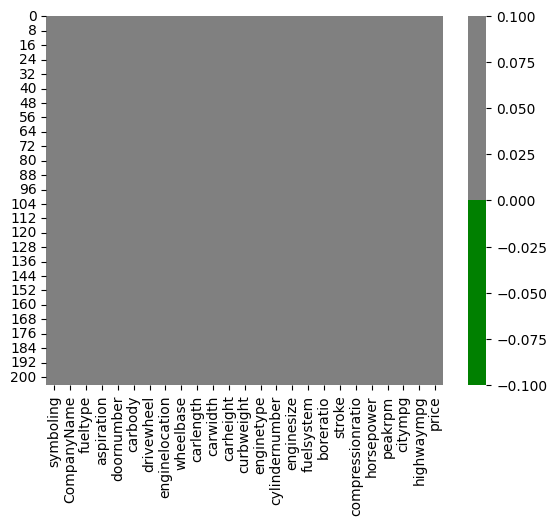

In [16]:

colours = ['green','grey'] 
sns.heatmap(data.isnull(),cmap = sns.color_palette(colours))


Из тепловой карты признаков делаем вывод, что у нас нет пропусков в данных.

**Нетипичные данные**

Работа с нетипичными данными ( выбросами) будет произведена ниже, когда мы будем визуализировать каждый признак.

**Удаление мусора**

Поиск дубликатов в данных:



In [17]:
d = data.copy()
finish_data = d.drop_duplicates()
finish_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CompanyName       205 non-null    category
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    category
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    category
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

Исходя из результатов, полных дубликатов в данных не было.

Разведочный анализ данных ( EDA ):

1) Изучение целевой переменной

    1.1 Распределение
    
    1.2 Меры центральной тенденции
    
    
2) Изучение признаков

    2.1 Выбросы
    
    2.2 Пропуски
    
    2.3 Генерация новых признаков
    
    2.4 Графики взаимного распределения
    
    2.5 Матрица корреляций
    
    
3) Изучение влияния признаков на целевую переменную

    3.1 Взаимное распределение 


**1. Изучение целевой переменной**

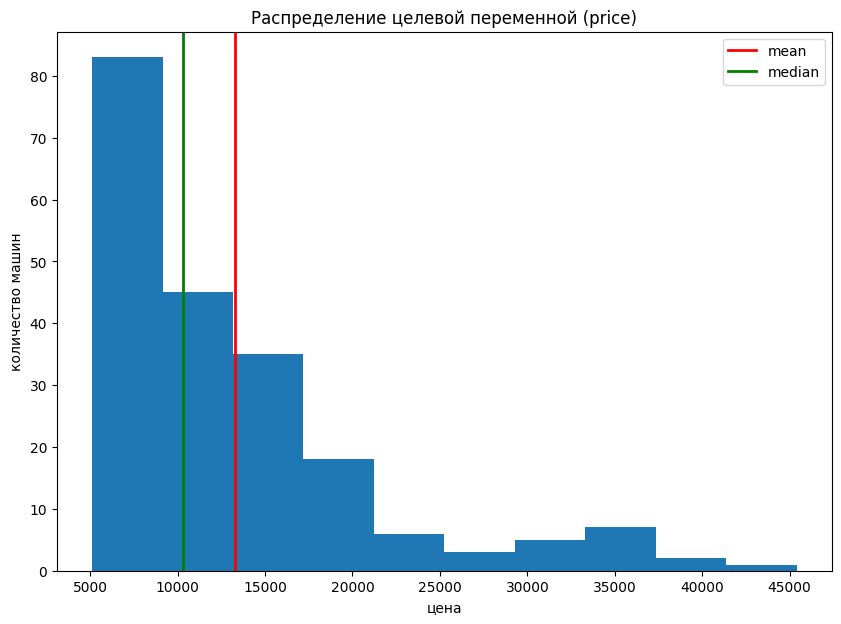

In [18]:
plt.figure(figsize=(10,7))

plt.hist(data['price'], bins=10)

plt.title('Распределение целевой переменной (price)')
plt.xlabel('цена')
plt.ylabel('количество машин')
plt.axvline(data['price'].mean(), color='red', linewidth=2, label='mean')
plt.axvline(data['price'].median(), color='green', linewidth=2, label='median')
plt.legend()
plt.show()

In [19]:
#Описательные статистики для целевой переменной 
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Заметки по выполненному анализу:


    Количество объектов (автомобилей ) ровняется 205. Цена на автомобили варьируется от 5118 до 45400. При этом среднее значение цены на автомобиль приблизительно равно 13276. Медиана равна 10295. Наиболее количество машин ( около 80 ) имеют ценовой диапозон от 5000 до 10000 тыс.

**2. Исследование признаков ( визуализация )**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CompanyName       205 non-null    category
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    category
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    category
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

Разделение признаков: 

- Числовые: 

'car_ID'- ID автомобиля ( уникальный )

'wheelbase' - колесная база (в транспорте продольное расстояние между осями передних и задних колес ) 

'carlength' - длина автомобиля

'carwidth' - ширина автомобиля

'carheight' - высота автомобиля

'curbweight' - максимальная собственная масса транспортного средства с полной загрузкой топливом и необходимыми для движения материалами

'enginesize' - размер двигателя

'boreratio' -  отношение длины хода (L) к диаметру отверстия (D, иначе Dia. из цилиндра)

'stroke' - фаза цикла двигателя (например, такт сжатия, такт выпуска), во время которой поршень перемещается сверху вниз или наоборот

'compressionratio' - степень сжатия (соотношение между объемом цилиндра и камерой сгорания в двигателе внутреннего сгорания при их максимальном и минимальном значениях)

'horsepower' - лошадиные силы

'peakrpm' - пиковые обороты в минуту

'citympg' - показатель среднего пройденного расстояния на единицу потребляемой энергии ( город )

'highwaympg' - показатель среднего пройденного расстояния на единицу потребляемой энергии ( шоссе )

'price' - цена автомобиля

- Категориальные:

'CarName' - название автомобиля

'fueltype' - тип топлива (gas, diesel) 

'aspiration' - тип двигателя (std : без наддува, turbo : турбо )

'doornumber' - кол-во дверей ( 4 или 2 )

'carbody' - кузов автомобиля (sedan : седан, hatchback : хэтчбек, wagon : универсал, hardtop : с жесткой крышей, convertible : кабриолет)

'drivewheel' - ведущее колесо. Это колесо автомобиля, которое передает усилие, преобразуя крутящий момент в тяговое усилие от шин к дороге, заставляя транспортное средство двигаться. (fwd, rwd, 4wd)

'enginelocation' - расположение двигателя (front : спереди, rear : сзади )

'enginetype' - тип двигателя (ohc, ohcf, ohcv, dohc, l, rotor, dohcv) 

'cylindernumber' - кол-во цилиндров (four, six, five, eight, two, three, twelve)

'fuelsystem' - топливная система (mpfi, 2bbl, idi, 1bbl, spdi, 4bbl, mfi, spfi)

'symboling' - безопасный ли автомобиль ( от -3(риск высокий) до 3(безопасный) ) Всего 6 уникальных значений.


Описательная статистика для числовых / категориальных признаков:

In [21]:
data[num_columns].describe()

wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.000000   
25%     97.000000    3.150000    3.110000          8.600000   70.000000   
50%    120.000000    3.310000    3.290000          9.000000   95.000000   
75%    141.000000    3.580000    3.410000          9.400000  116.000000   
max    326.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  
count   205.000000  205.000000  205.000000    205.000000  
mean   5125.121951   25.219512   30.751220  13276.710571  
std     476.985643    6.542142    6.886443   7988.852332  
min    4150.000000   13.000000   16.000000   5118.000000  
25%    4800.000000   19.000000   25.000000   7788.000000  
50%    5200.000000   24.000000   30.000000  10295.000000  
75%    5500.000000   30.000000   34.000000  16503.000000  
max    6600.000000   49.000000   54.000000  45400.000000

In [22]:
data[cat_columns].describe(include=['category'])

symboling CompanyName fueltype aspiration doornumber carbody  \
count         205         205      205        205        205     205   
unique          6          28        2          2          2       5   
top             0      toyota      gas        std       four   sedan   
freq           67          31      185        168        115      96   

       drivewheel enginelocation enginetype cylindernumber fuelsystem  
count         205            205        205            205        205  
unique          3              2          7              7          8  
top           fwd          front        ohc           four       mpfi  
freq          120            202        148            159         94

Исследование категориальных признаков:

**CompanyName**

Посмотрим на категориальный признак CompanyName поближе.

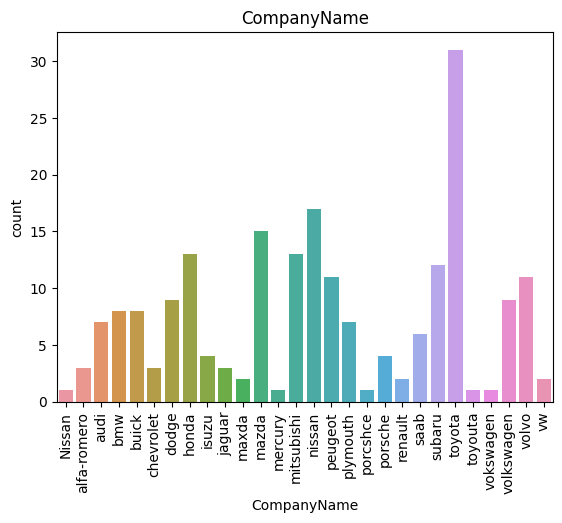

In [23]:
ax = sns.countplot(data = data, x = 'CompanyName')
plt.title(f'CompanyName')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [24]:
data['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

In [25]:
data['CompanyName'].unique()

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo']
Length: 28
Categories (28, object): ['Nissan', 'alfa-romero', 'audi', 'bmw', ..., 'vokswagen', 'volkswagen', 'volvo', 'vw']

Посмотрев на значения, которые принимает признак CompanyName, можем заметить, что у нас есть несколько значений, которые записаны по разному, но несут собой одну и ту же информацию:

    - 'maxda' = 'mazda'
    - 'Nissan' = 'nissan'
    - 'porsche' = 'porcshce'
    - 'toyota' = 'toyouta' 
    - 'vokswagen' = 'volkswagen' = 'vw'
    
Поэтому нам необходимо исправить эту ошибку, заменив неправильные названия компаний на верные:
    
    

In [26]:
def func_for_replace(x1,x2):
     data["CompanyName"].replace(x1,x2,inplace=True)

In [27]:
func_for_replace('maxda','mazda')
func_for_replace('Nissan','nissan')
func_for_replace('porcshce','porsche' )
func_for_replace('toyouta','toyota')
func_for_replace('vw','volkswagen')
func_for_replace('vokswagen','volkswagen')

In [28]:
data['CompanyName'].unique()

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'buick', ..., 'subaru', 'toyota', 'volkswagen', 'volvo']

Построим графики для данного признака.

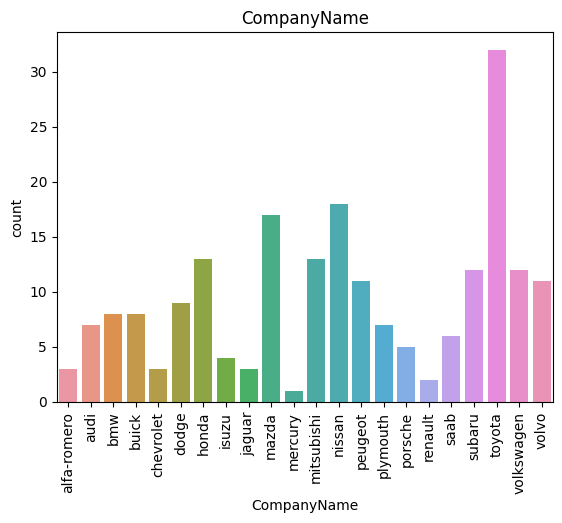

In [29]:
ax = sns.countplot(data = data, x = 'CompanyName')
plt.title(f'CompanyName')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

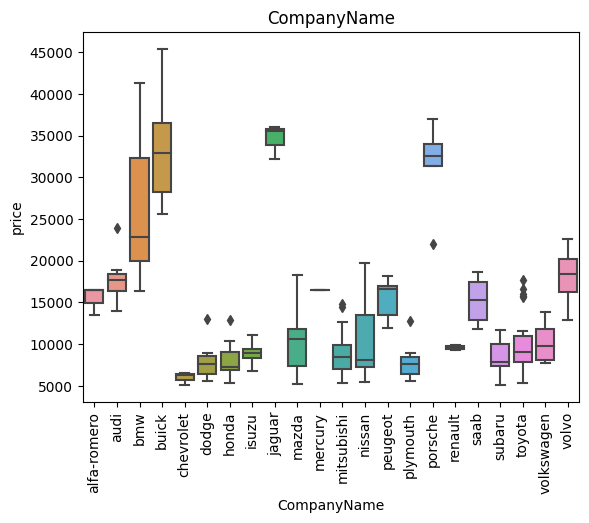

In [30]:
ax = sns.boxplot(x = 'CompanyName', y = 'price', data = data)
plt.title(f'CompanyName')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

<AxesSubplot: >

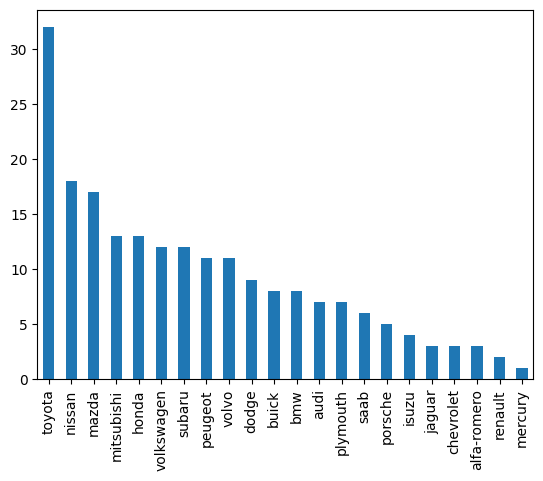

In [31]:
data['CompanyName'].value_counts().plot.bar()

____

На основании графиков можно сказать, что больше всего машин марки toyota, наименьшее же количество марки mercury.

**Fueltype**

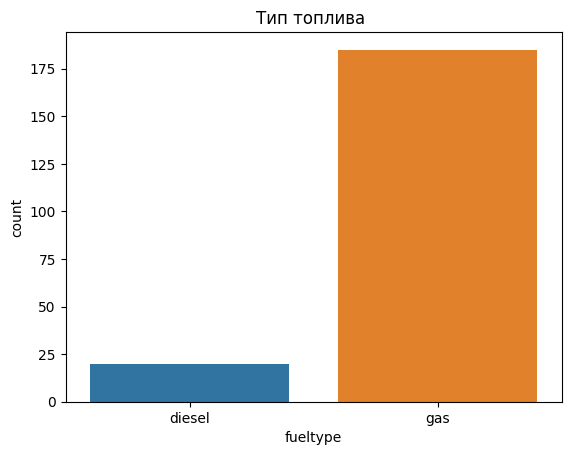

In [32]:
ax = sns.countplot(data = data, x = 'fueltype')
plt.title(f'Тип топлива ')
plt.show()

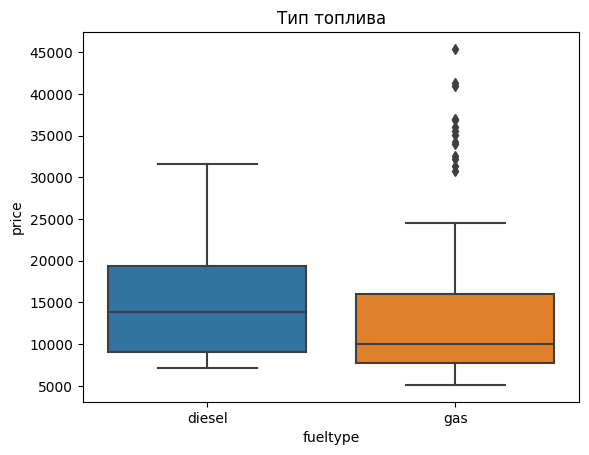

In [33]:
ax = sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.title(f'Тип топлива')
plt.show()

In [34]:
mas_fueltype = ['gas','diesel']
colors = ['b','g']
mas = list(zip(mas_fueltype, colors))

<Figure size 1200x500 with 0 Axes>

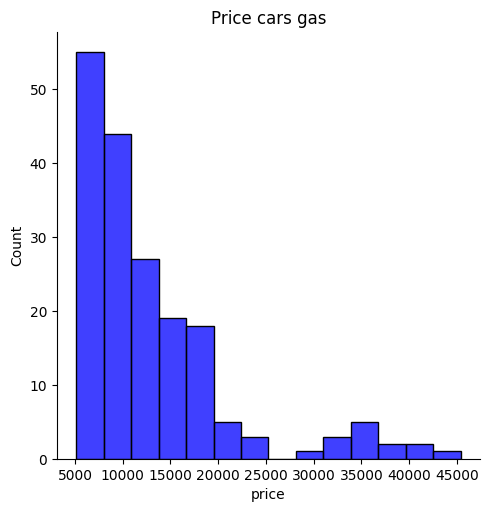

<Figure size 1200x500 with 0 Axes>

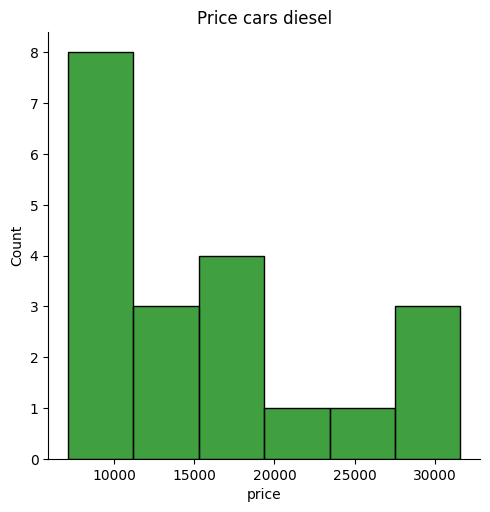

In [35]:
for i in mas:
    plt.figure(figsize=(12,5))
    sns.displot(data[(data.fueltype== i[0])]["price"],color=i[1])
    plt.title(f'Price cars {i[0]}')
    plt.show()

'symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

_____
На основе полученных результатов делаем выводы, что большее количество автомобилей используют газовое топливо. Также стоит отметить, что цены на автомобили использующие дизель выше, чем на модели с другим типом топлива. 

**Aspiration**

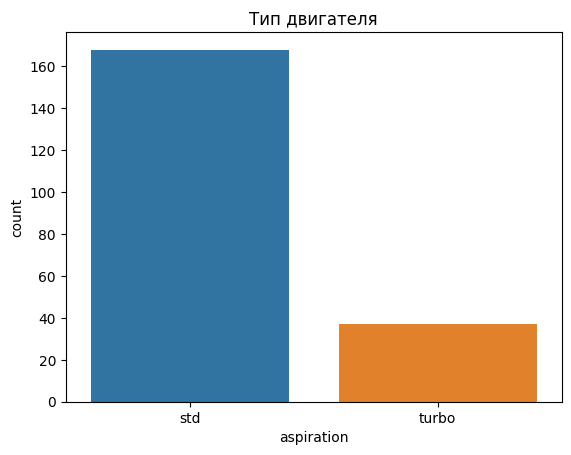

In [36]:
ax = sns.countplot(data = data, x = 'aspiration')
plt.title(f'Тип двигателя')
plt.show()

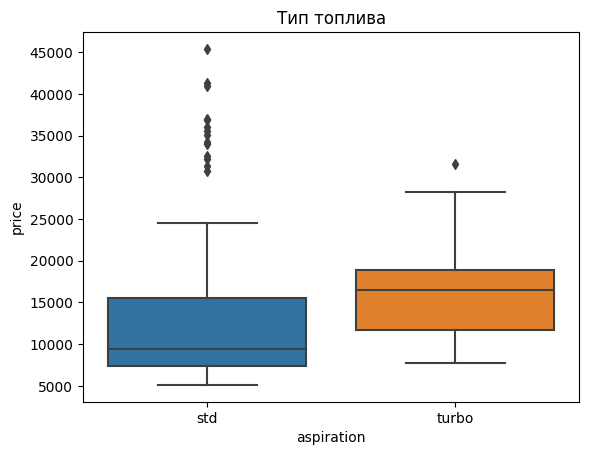

In [37]:
ax = sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.title(f'Тип топлива')
plt.show()

In [38]:
m = ['std','turbo']
colors = ['b','g']
mas = list(zip(m, colors))

<Figure size 1200x500 with 0 Axes>

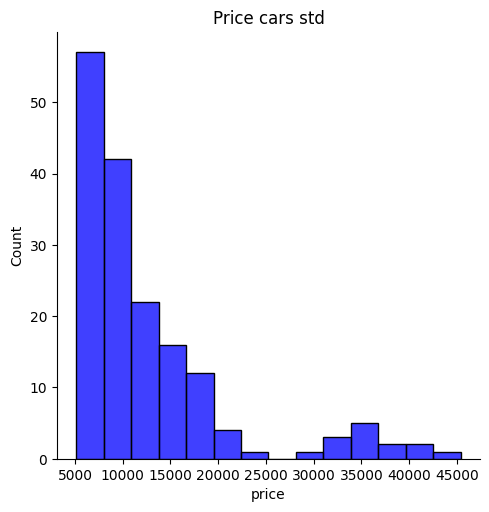

<Figure size 1200x500 with 0 Axes>

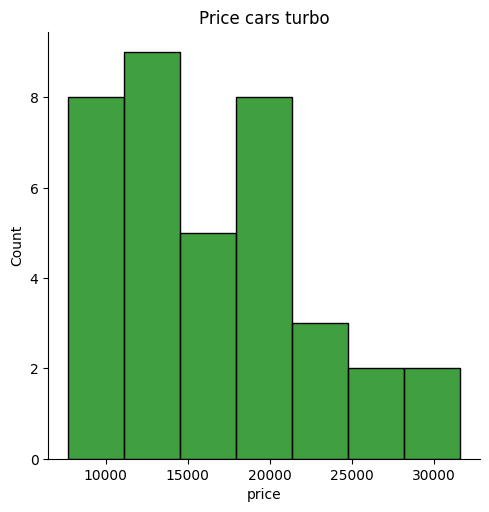

In [39]:
for i in mas:
    plt.figure(figsize=(12,5))
    sns.displot(data[(data.aspiration== i[0])]["price"],color=i[1])
    plt.title(f'Price cars {i[0]}')
    plt.show()

___________
Намного чаще в автомобилях используют стандарный тип двигателя(std), цена же на turbo двигатели выше, чем на стандарную модель.

**Doornumber**

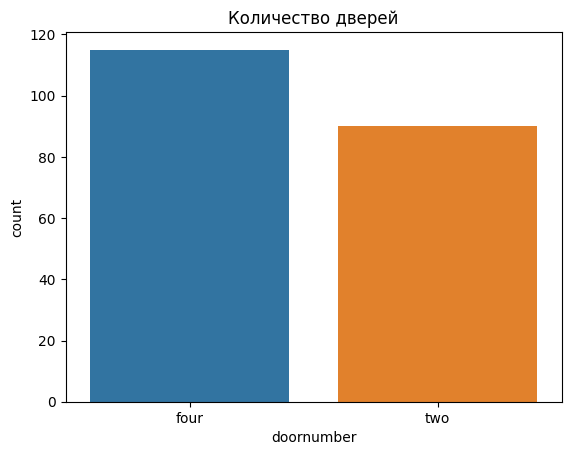

In [40]:
ax = sns.countplot(data = data, x = 'doornumber')
plt.title(f'Количество дверей')
plt.show()

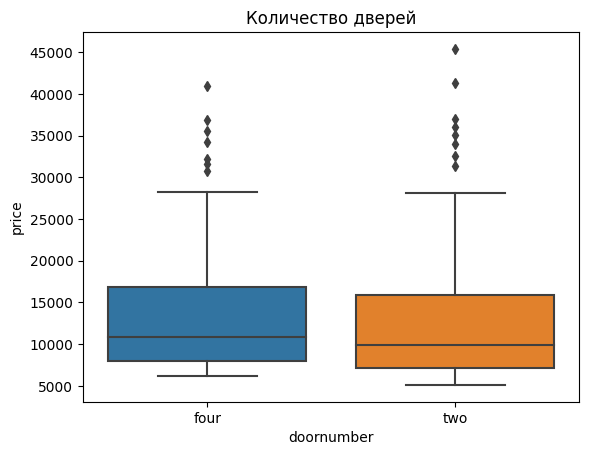

In [41]:
ax = sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.title(f'Количество дверей')
plt.show()

In [42]:
m = ['four','two']
colors = ['b','g']
mas = list(zip(m, colors))

<Figure size 1200x500 with 0 Axes>

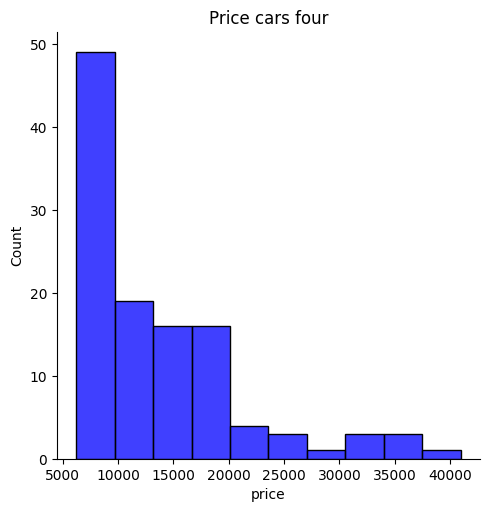

<Figure size 1200x500 with 0 Axes>

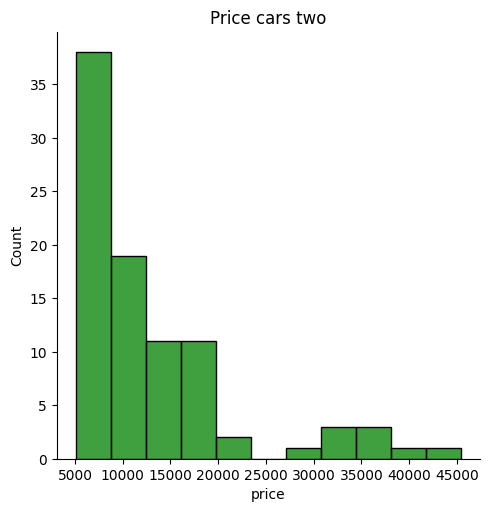

In [43]:
for i in mas:
    plt.figure(figsize=(12,5))
    sns.displot(data[(data.doornumber== i[0])]["price"],color=i[1])
    plt.title(f'Price cars {i[0]}')
    plt.show()

Исходя из построенных графиков, приходим к соответствующим выводам:

    - Кол-во машин с 4-мя дверьми превышает кол-во машин с 2-мя, но не на много.
    
    - Распределения похожи друг на друга.
    
    - Цены на машины с 2-мя и 4-мя дверьми находятся приблизительно в одном диапазоне.

**Сarbody**

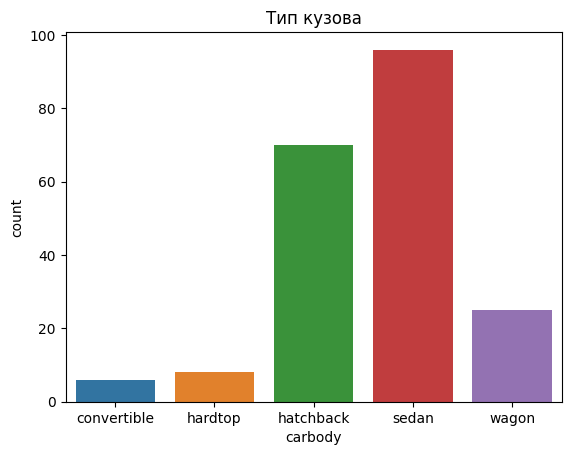

In [44]:
ax = sns.countplot(data = data, x = 'carbody')
plt.title(f'Тип кузова')
plt.show()

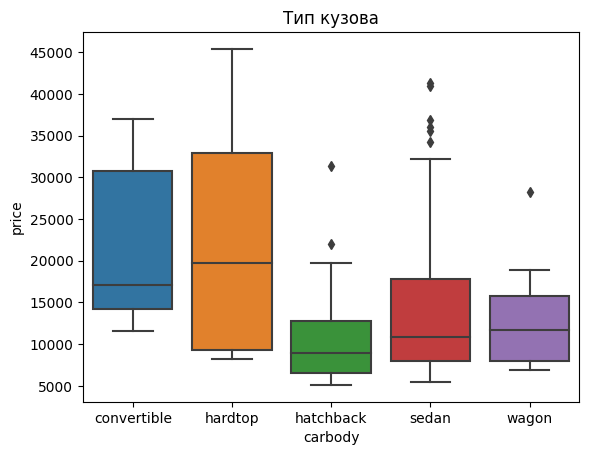

In [45]:
ax = sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.title(f'Тип кузова')
plt.show()

In [46]:
m = list(data.carbody.unique())
colors = ['b','g','black','r','yellow']
mas = list(zip(m, colors))

<Figure size 1200x500 with 0 Axes>

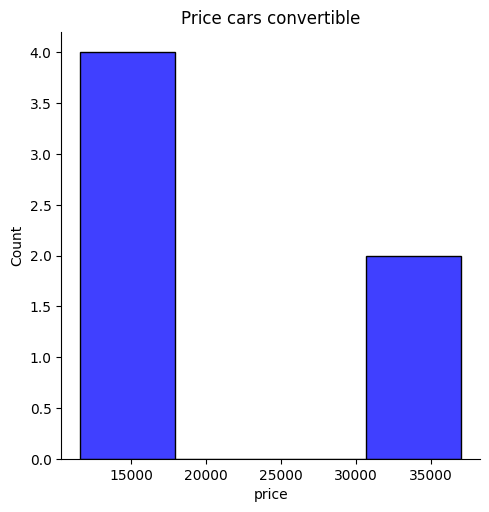

<Figure size 1200x500 with 0 Axes>

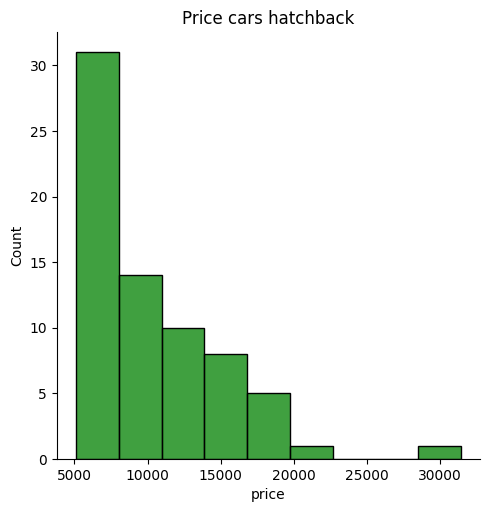

<Figure size 1200x500 with 0 Axes>

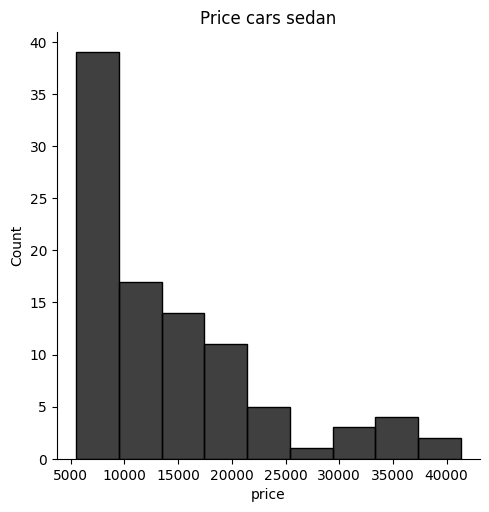

<Figure size 1200x500 with 0 Axes>

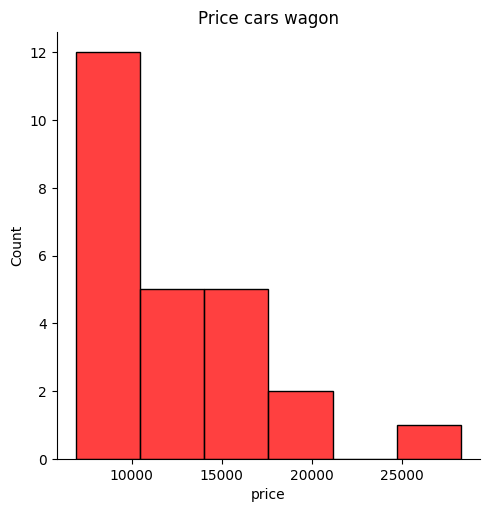

<Figure size 1200x500 with 0 Axes>

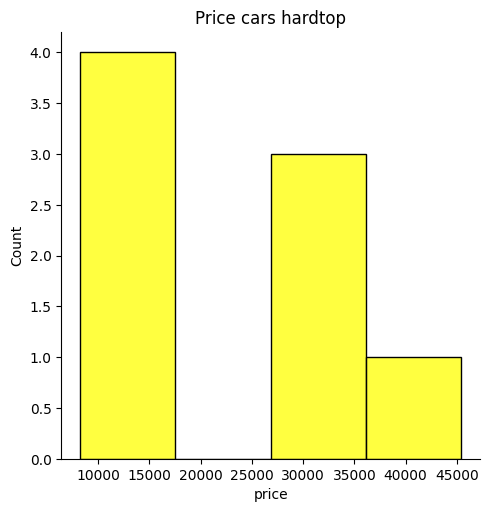

In [47]:
for i in mas:
    plt.figure(figsize=(12,5))
    sns.displot(data[(data.carbody== i[0])]["price"],color=i[1])
    plt.title(f'Price cars {i[0]}')
    plt.show()

Наблюдения:

    - Больше всего востребованы такие типы кузова как sedan и hatchback
    
    - Наивысшую цену из всех моделей имеет hardtop

**Drivewheel**

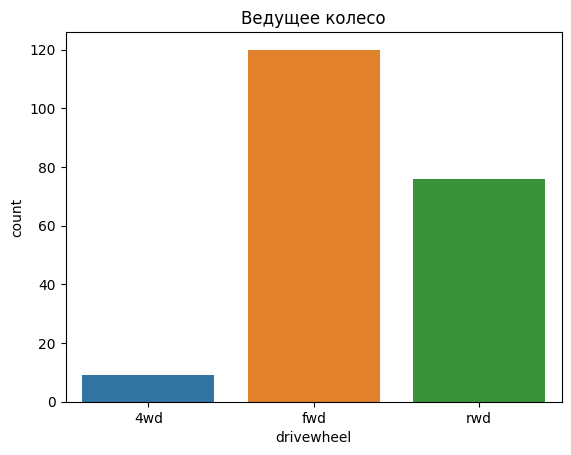

In [48]:
ax = sns.countplot(data = data, x = 'drivewheel')
plt.title(f'Ведущее колесо')
plt.show()

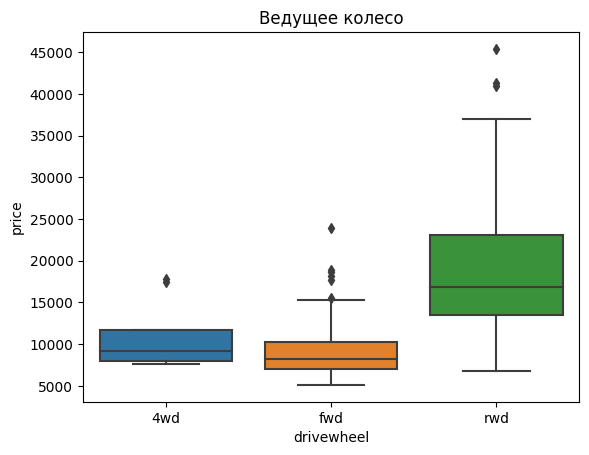

In [49]:
ax = sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.title(f'Ведущее колесо')
plt.show()

________

Чаще всего в автомобилях ведущее колесо fwd. Наиболее большую цену имеют машины  с ведущим колесом rwd.

**Enginelocation**

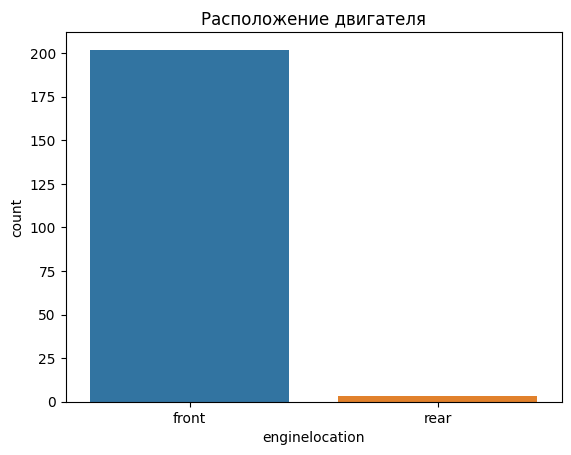

In [50]:
ax = sns.countplot(data = data, x = 'enginelocation')
plt.title(f'Расположение двигателя')
plt.show()

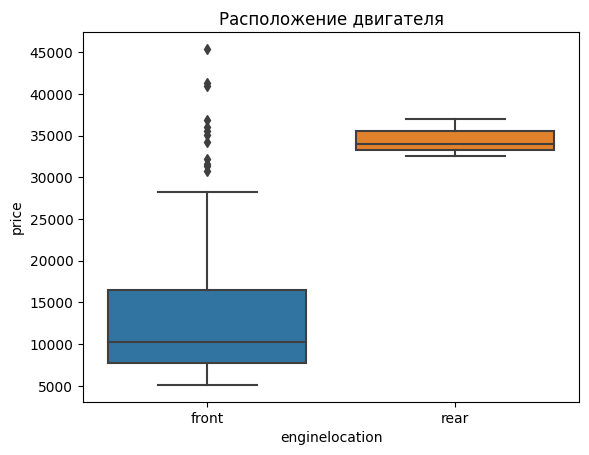

In [51]:
ax = sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.title(f'Расположение двигателя')
plt.show()

________
Почти всегда в автомобилях двигатель располагается спереди и лишь за редким исключением сзади. Однако цены на машины с двигателем расположеным в задней части автомобиля  выше.

**Enginetype**

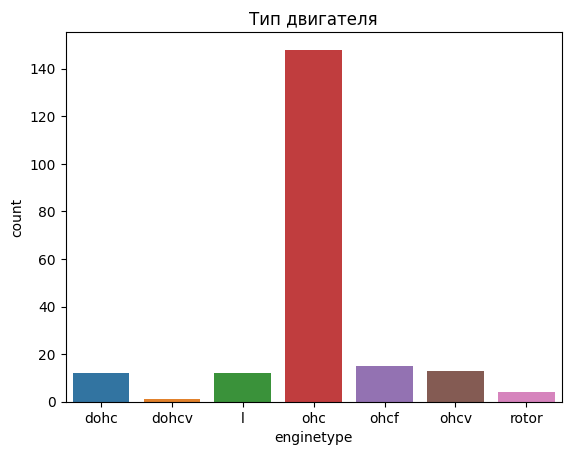

In [52]:
ax = sns.countplot(data = data, x = 'enginetype')
plt.title(f'Тип двигателя')
plt.show()

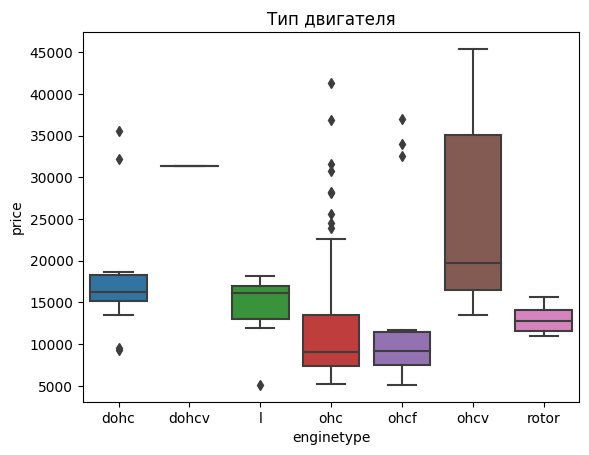

In [53]:
ax = sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.title(f'Тип двигателя')
plt.show()

___________
Чаще всего в автомобилях встречается тип двигателя ohc, при этом самый высокий ценовой диапазон у машин с типом двигателя ohcv.

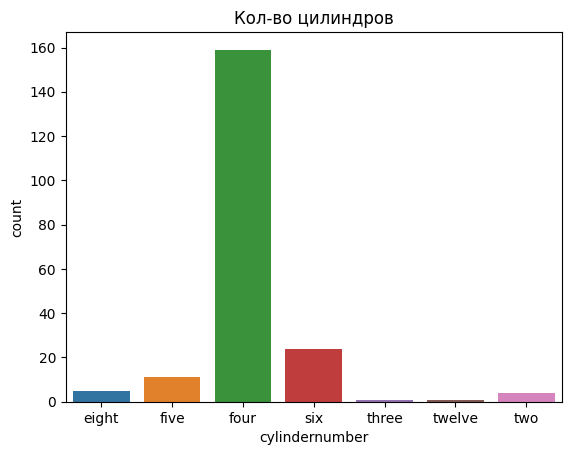

In [54]:
ax = sns.countplot(data = data, x = 'cylindernumber')
plt.title(f'Кол-во цилиндров')
plt.show()

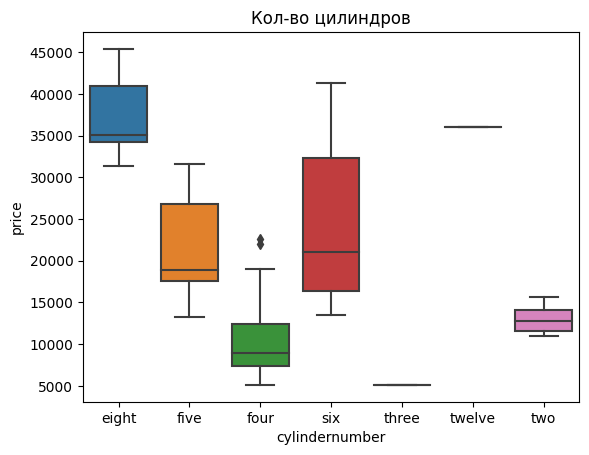

In [55]:
ax = sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.title(f'Кол-во цилиндров')
plt.show()

___________
Почти все автомобили имеют кол-во цилиндров в размере 4, при этом наиболее высокий ценовой диапазон имеют автомобили с восьмью цилиндрами.

**Fuelsystem**

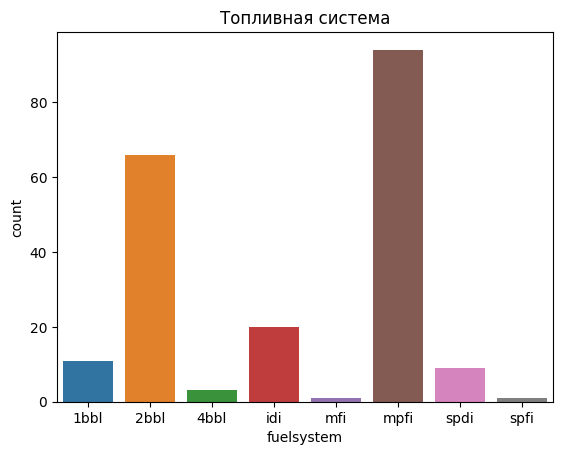

In [56]:
ax = sns.countplot(data = data, x = 'fuelsystem')
plt.title(f'Топливная система')
plt.show()

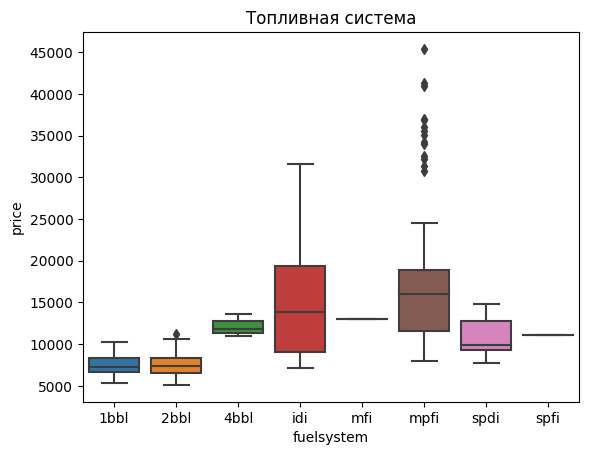

In [57]:
ax = sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.title(f'Топливная система')
plt.show()

_____
Самая часто используемая топливная система в наших данных - это mpfi.Самые непопулярные - mfi,spfi. Наибольший ценовой диапазон имеют машины с топливной системой idi.

**Symboling**

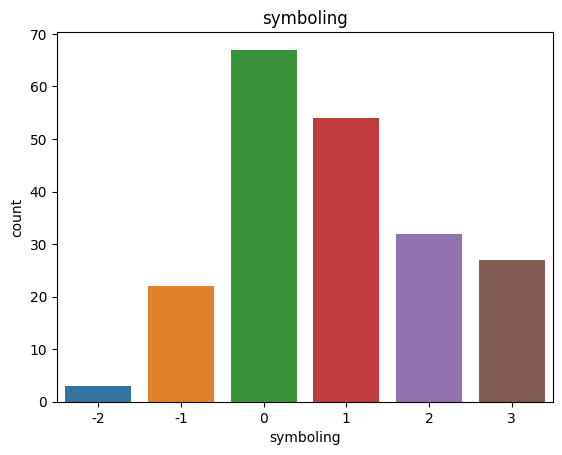

In [58]:
ax = sns.countplot(data = data, x = 'symboling')
plt.title(f'symboling')
plt.show()

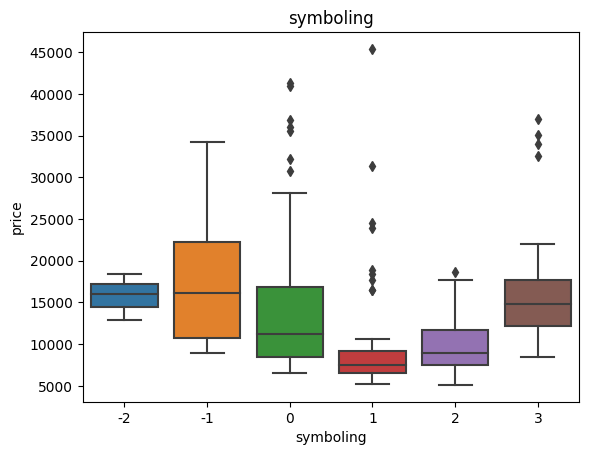

In [59]:
ax = sns.boxplot(x = 'symboling', y = 'price', data = data)
plt.title(f'symboling')
plt.show()

________
Наибольшее количество автомобилей имеют отметку безопасностни  0, отметку -2 получилось самое маленькое число авто ( отметку самого высокого риска (-3) не получила не одна машина ). При этом наибольший ценовой диапазон имеют автомобили с отметкой безопасности -1.

**Числовые признаки**

In [60]:
print(num_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


Посмотрим на график распределения пар числовых признаков с помощью сетки  точечных диаграмм. 
Он также содержит гистограмму для каждой функции в диагональных прямоугольниках.

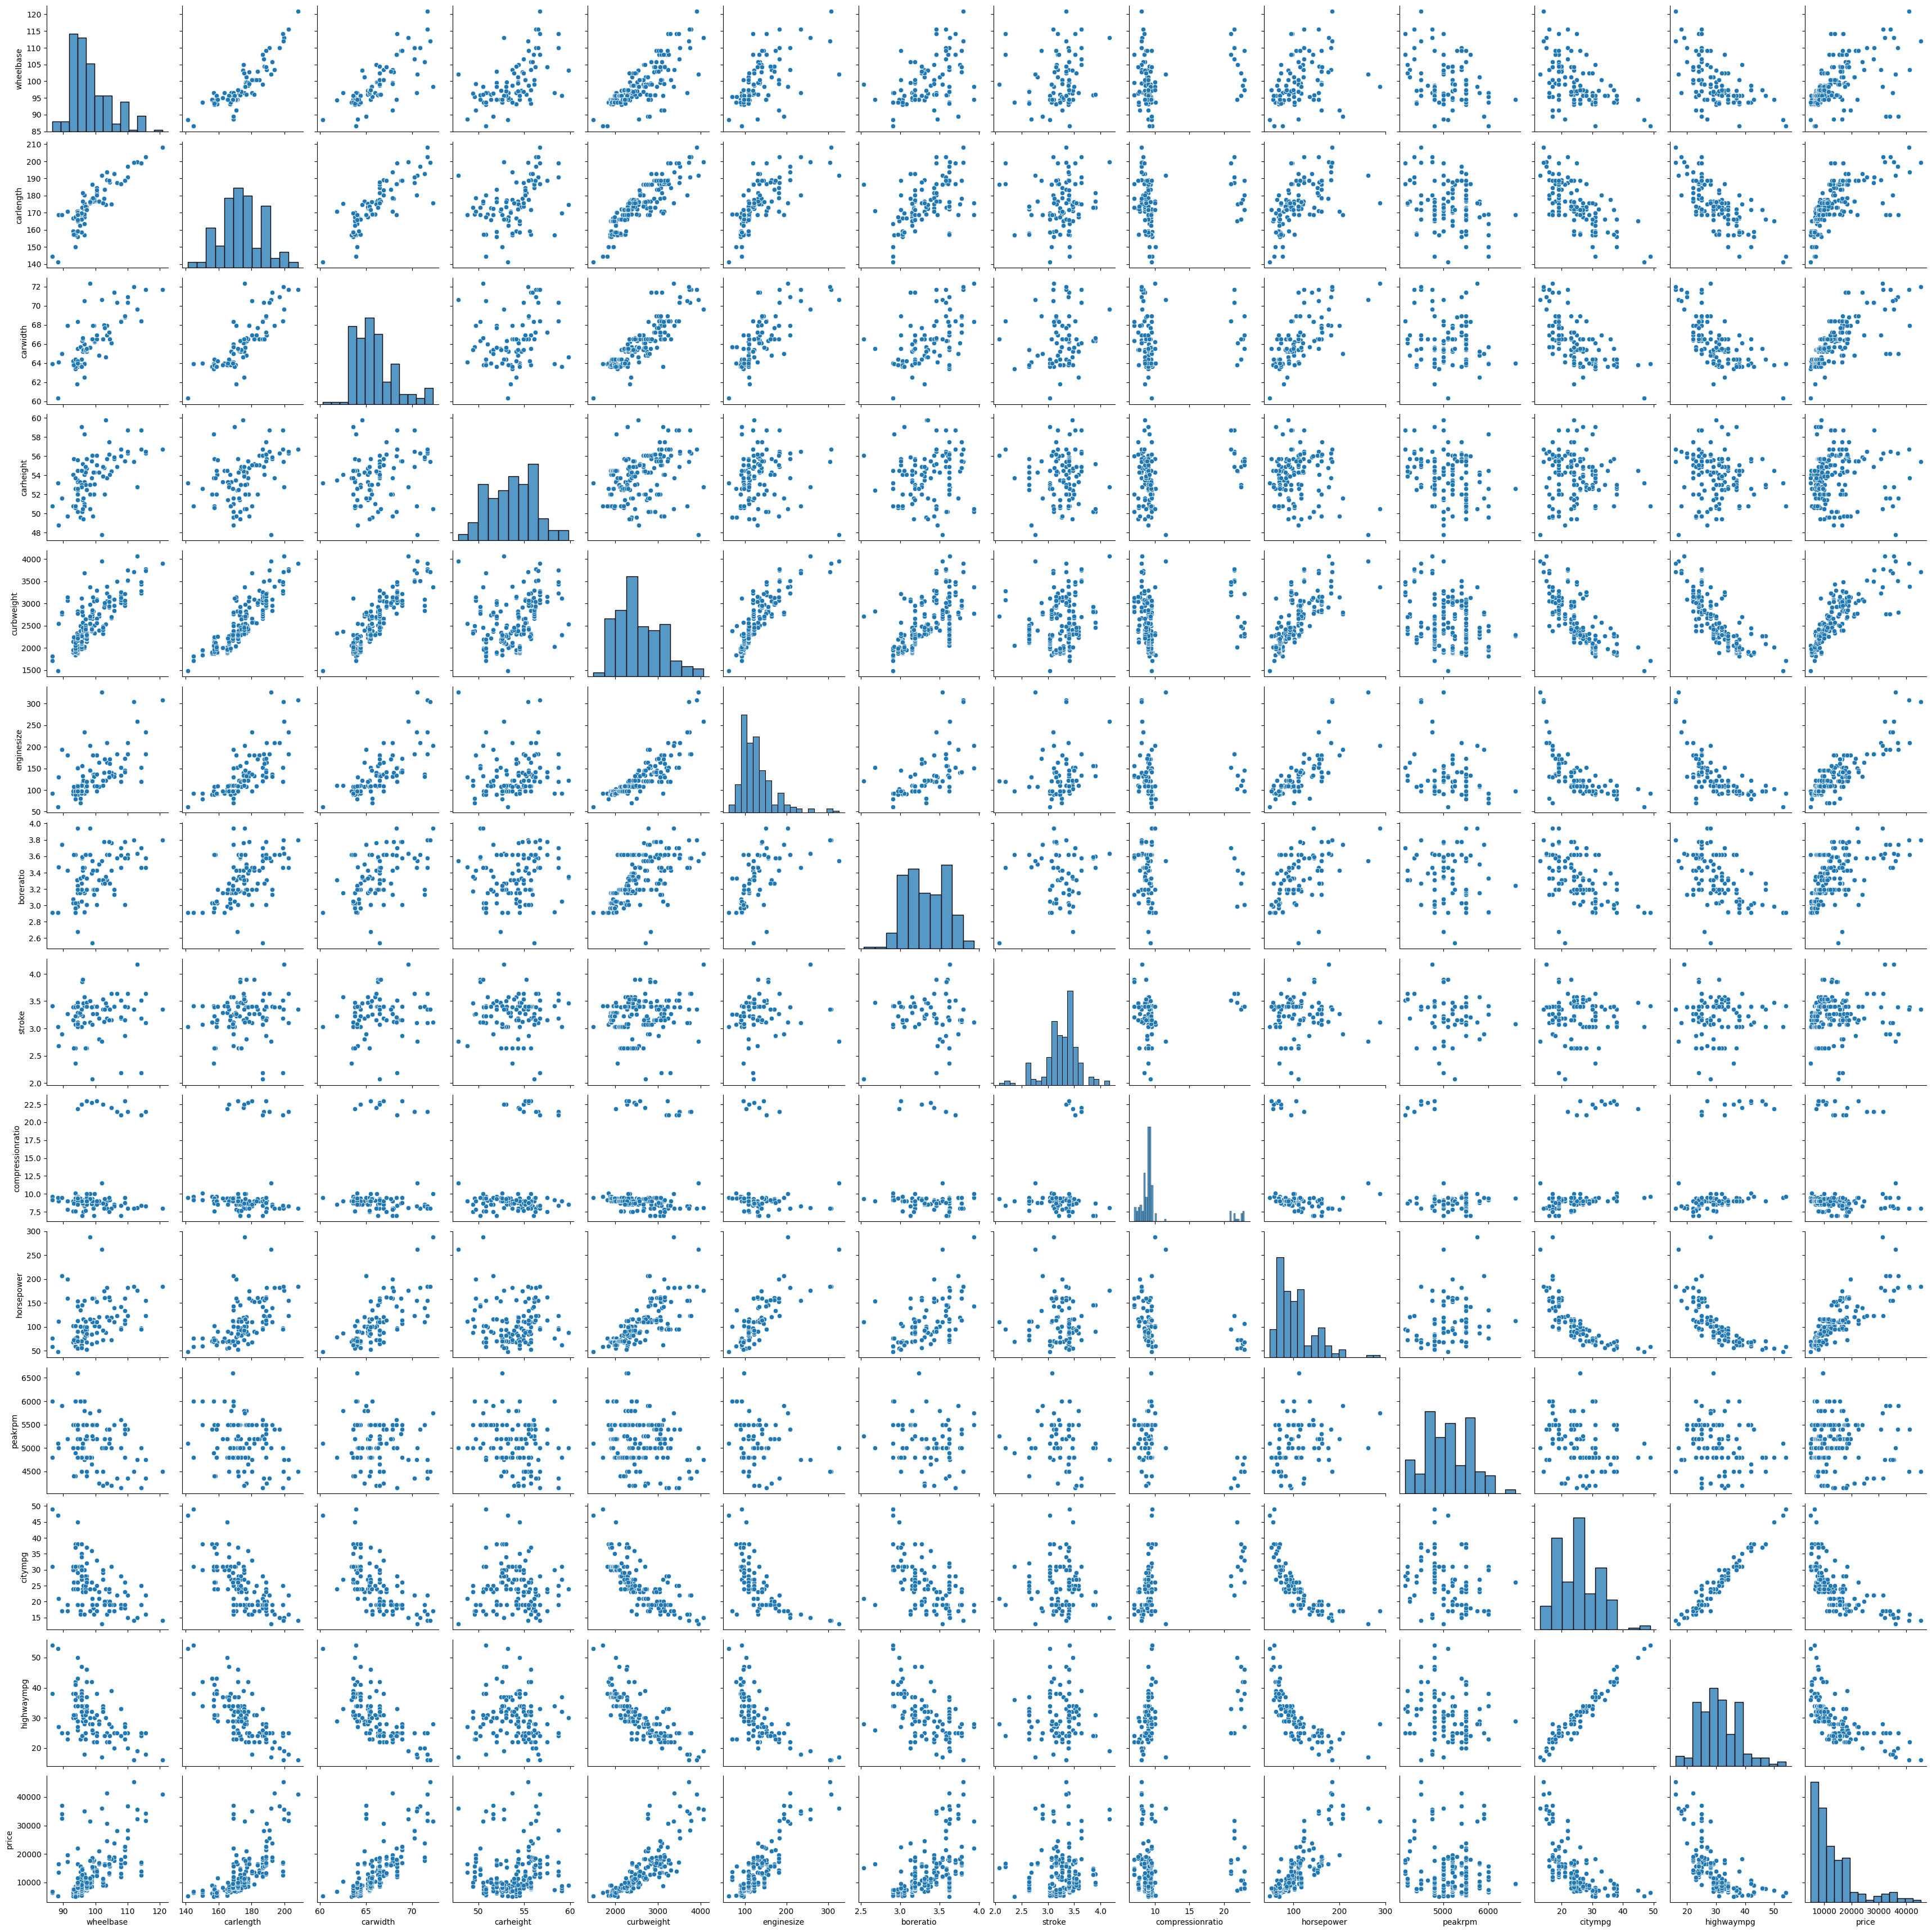

In [61]:
sns.pairplot(data[num_columns])

**Wheelbase**

Text(0, 0.5, 'price')

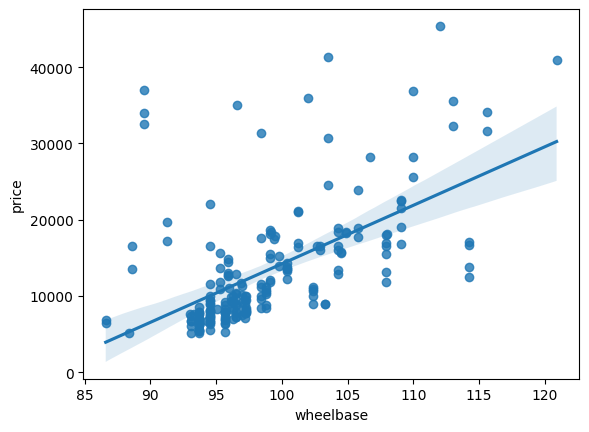

In [62]:
sns.regplot(x='wheelbase', y='price', data=data)
plt.xlabel('wheelbase')
plt.ylabel('price')

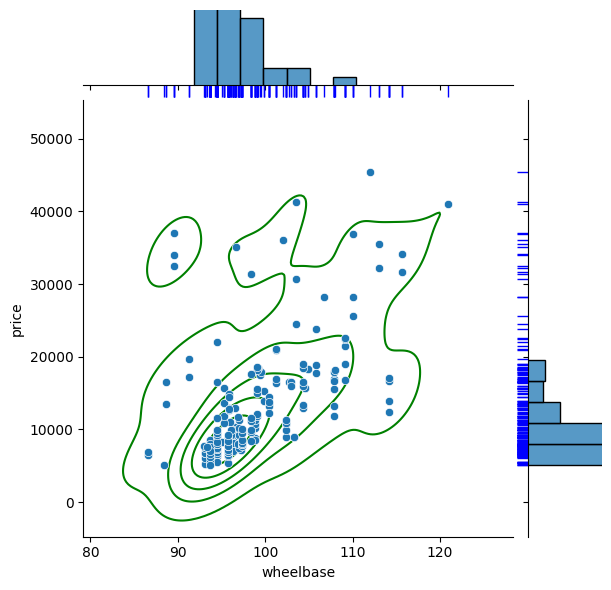

In [63]:
f = sns.jointplot(data=data, x='wheelbase', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

___________

Наблюдается сильный разброс точек на диаграмме рассеивания. 

**Carlength**

Text(0, 0.5, 'price')

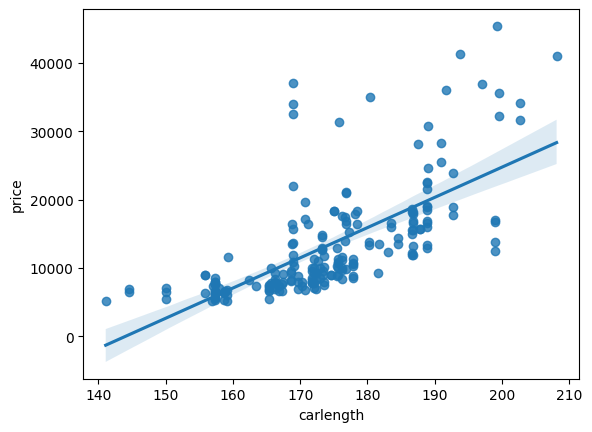

In [64]:
sns.regplot(x='carlength', y='price', data=data)
plt.xlabel('carlength')
plt.ylabel('price')

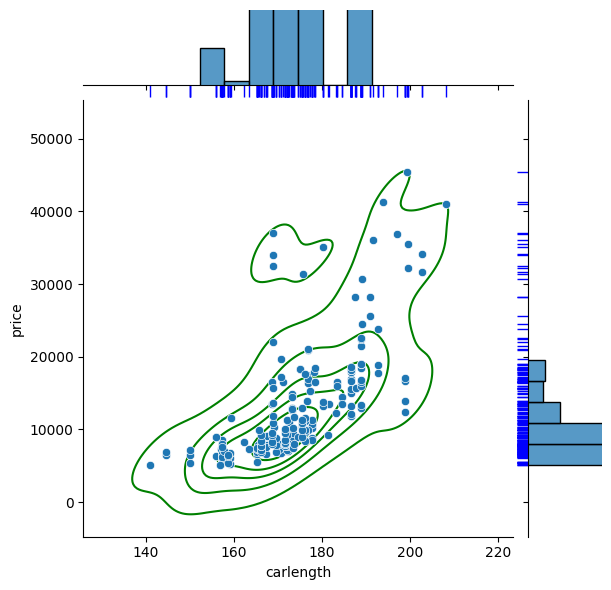

In [65]:
f = sns.jointplot(data=data, x='carlength', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

_______
Тут разброс точек меньше чем у предыдущего признака, но он все ещё есть.

**Carwidth**

Text(0, 0.5, 'price')

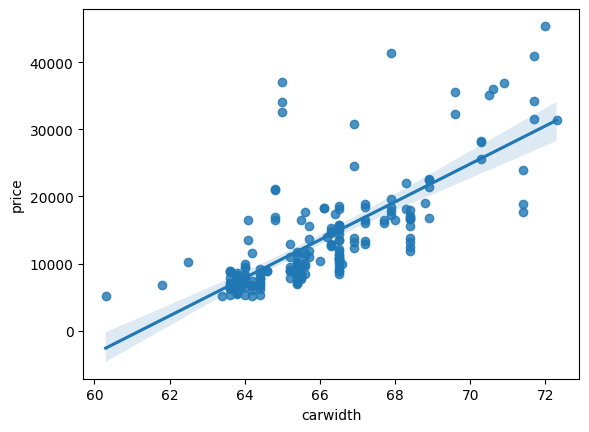

In [66]:
sns.regplot(x='carwidth', y='price', data=data)
plt.xlabel('carwidth')
plt.ylabel('price')

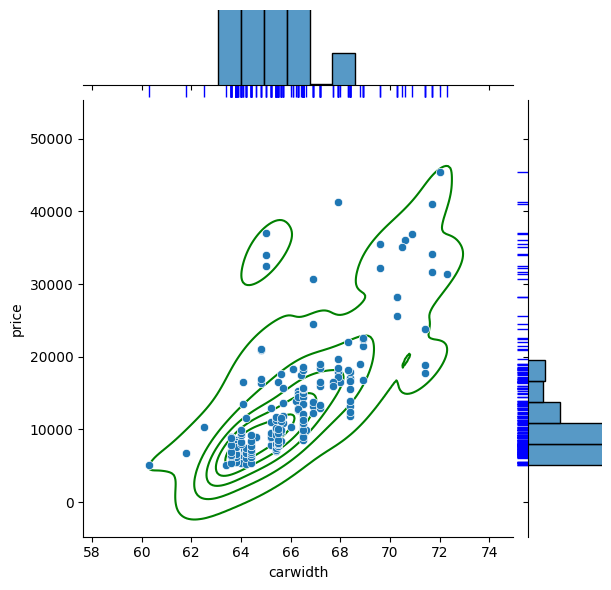

In [67]:
f = sns.jointplot(data=data, x='carwidth', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

____
Разброс точек у признака ширины машины ещё меньше, чем у двух предыдущих. Также здесь более выражена положительная корреляция ( при увеличении 'carwidth' увлеичивается 'price')

Посмотрим на диаграмму рассеяния с линией регрессии, показывающей тенденцию в данных для признаков длины автомобиля и его ширины. ( На Pairplote зависимость просматривалась )

Text(0, 0.5, 'carlength')

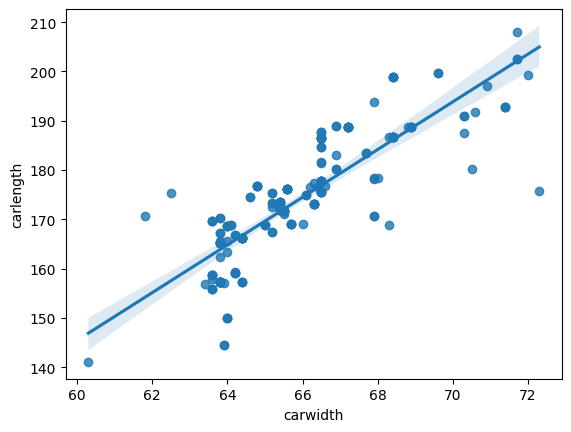

In [68]:
sns.regplot(x='carwidth', y='carlength', data=data)
plt.xlabel('carwidth')
plt.ylabel('carlength')

_________
И да, получается, что между шириной и длиной авто сильная положительная корреляция.

**Curbweight**

Text(0, 0.5, 'price')

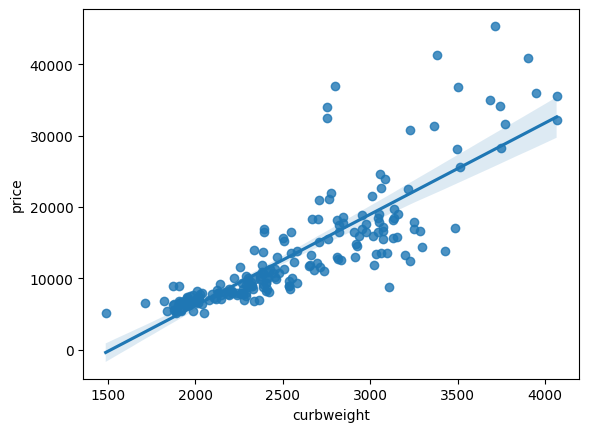

In [69]:
sns.regplot(x='curbweight', y='price', data=data)
plt.xlabel('curbweight')
plt.ylabel('price')

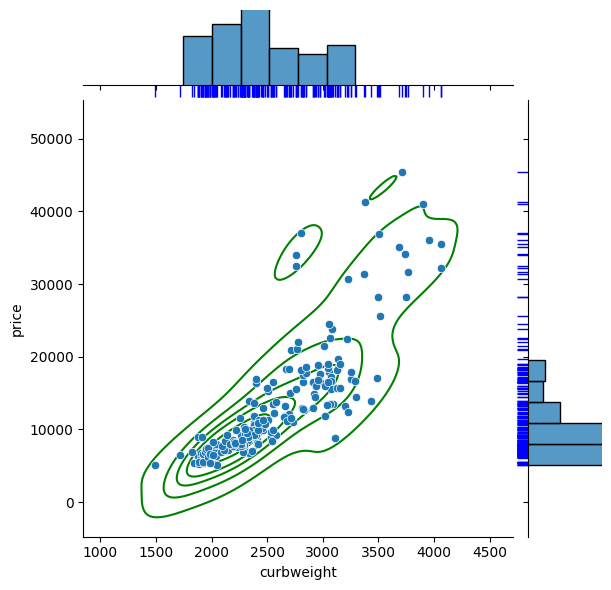

In [70]:
f = sns.jointplot(data=data, x='curbweight', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

**Enginesize** 

Text(0, 0.5, 'price')

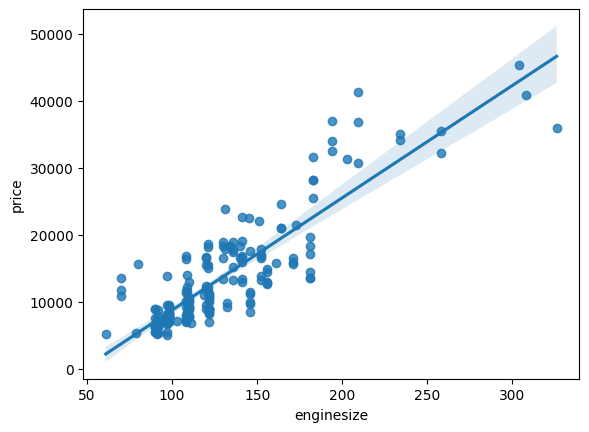

In [71]:
sns.regplot(x='enginesize', y='price', data=data)
plt.xlabel( 'enginesize' )
plt.ylabel('price')

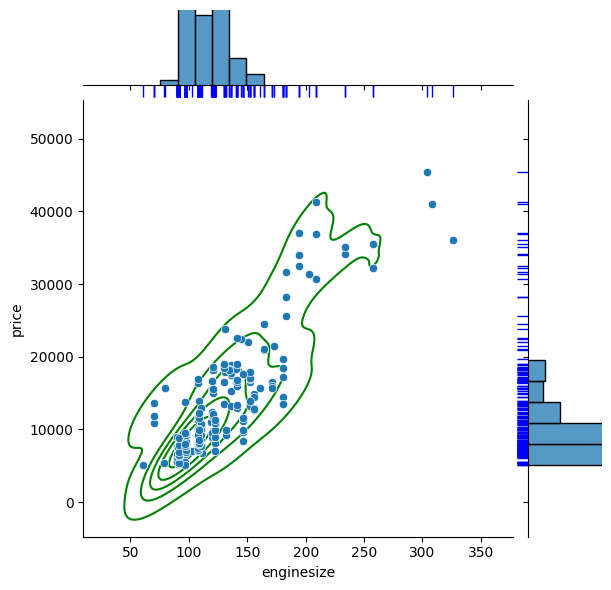

In [72]:
f = sns.jointplot(data=data, x='enginesize', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

**Boreratio** 'boreratio'

Text(0, 0.5, 'price')

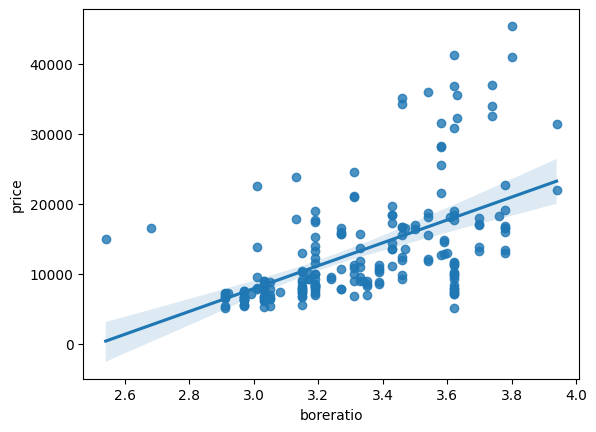

In [73]:
sns.regplot(x='boreratio', y='price', data=data)
plt.xlabel('boreratio')
plt.ylabel('price')

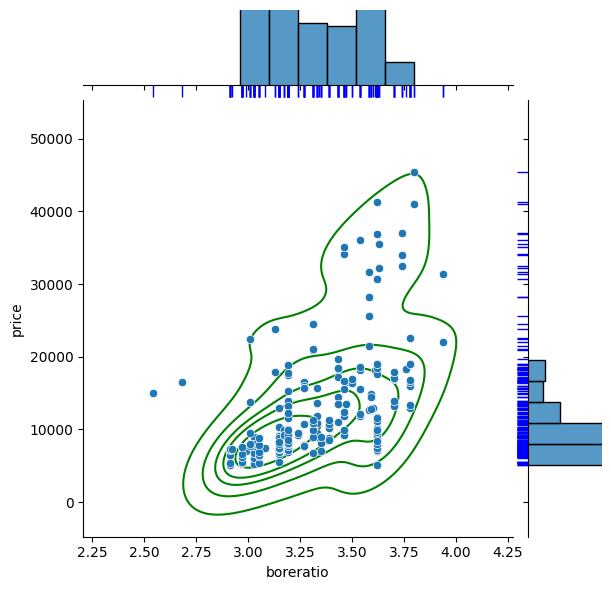

In [74]:
f = sns.jointplot(data=data, x='boreratio', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

**Stroke** 

Text(0, 0.5, 'price')

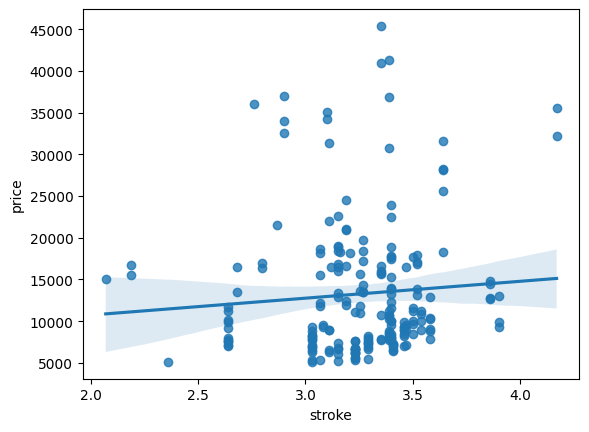

In [75]:
sns.regplot(x='stroke', y='price', data=data)
plt.xlabel('stroke')
plt.ylabel('price')

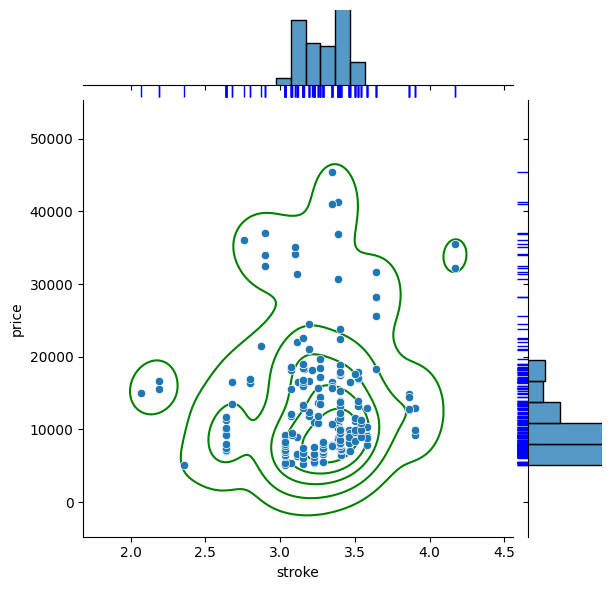

In [76]:
f = sns.jointplot(data=data, x='stroke', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

____
Наблюдается очень слабая корреляция между фазой цикла двигателя и ценой, достаточно сильный расброс точек.

**Compressionratio**   'compressionratio'  степень сжатия

Text(0, 0.5, 'price')

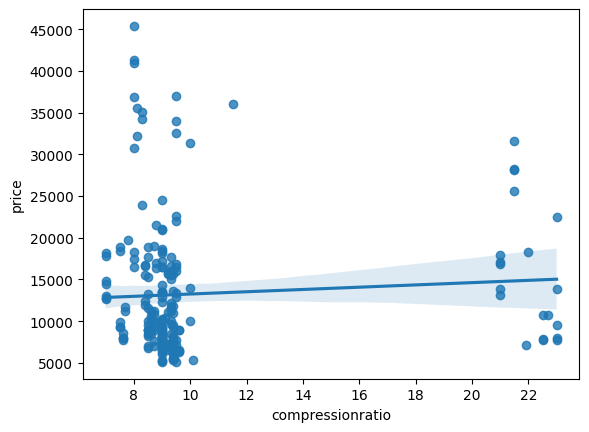

In [77]:
sns.regplot(x='compressionratio', y='price', data=data)
plt.xlabel('compressionratio')
plt.ylabel('price')

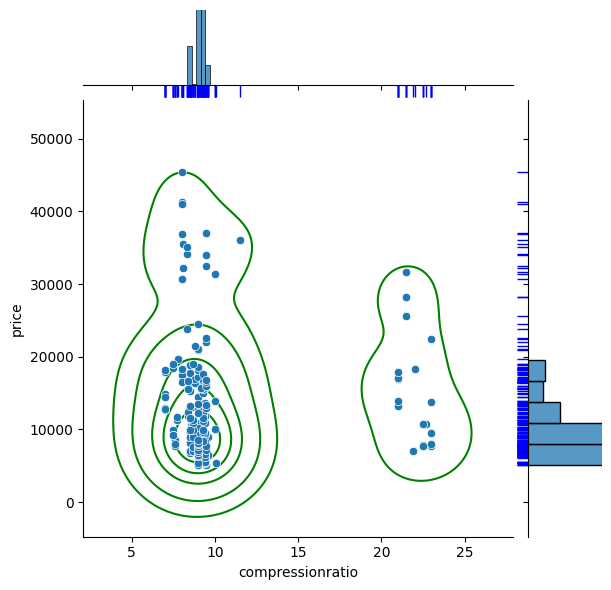

In [78]:
f = sns.jointplot(data=data, x='compressionratio', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

___

Корреляция между степенью сжатия и ценой отсутствует.

**Horsepower** 'horsepower'

Text(0, 0.5, 'price')

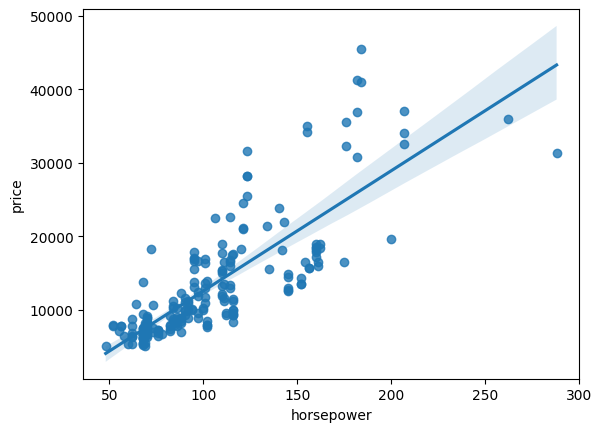

In [79]:
sns.regplot(x='horsepower', y='price', data=data)
plt.xlabel('horsepower')
plt.ylabel('price')

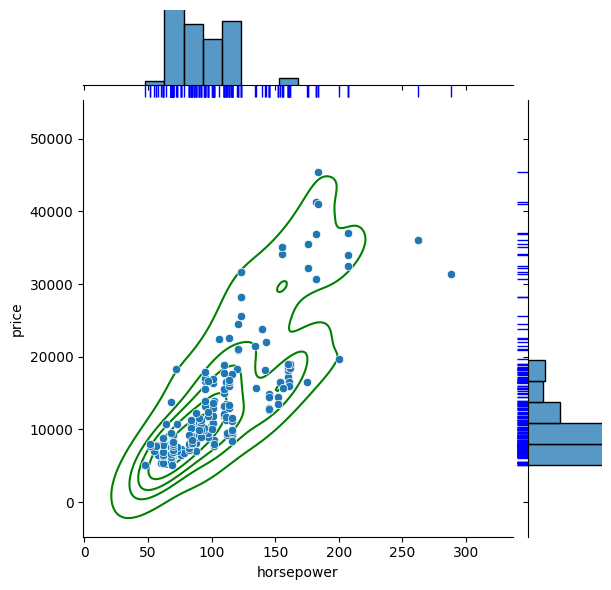

In [80]:
f = sns.jointplot(data=data, x='horsepower', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

**Peakrpm** 'peakrpm' - пиковые обороты в минуту

Text(0, 0.5, 'price')

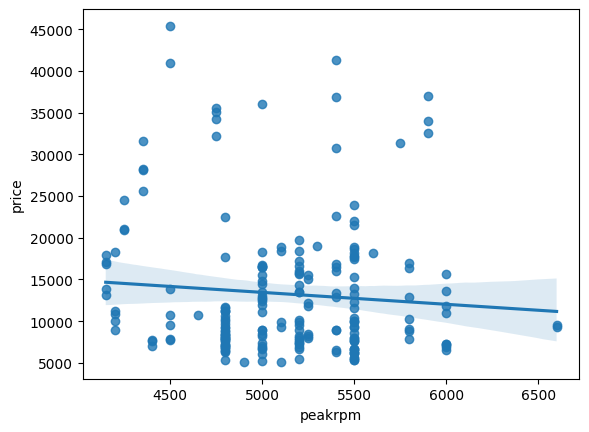

In [81]:
sns.regplot(x='peakrpm', y='price', data=data)
plt.xlabel('peakrpm')
plt.ylabel('price')

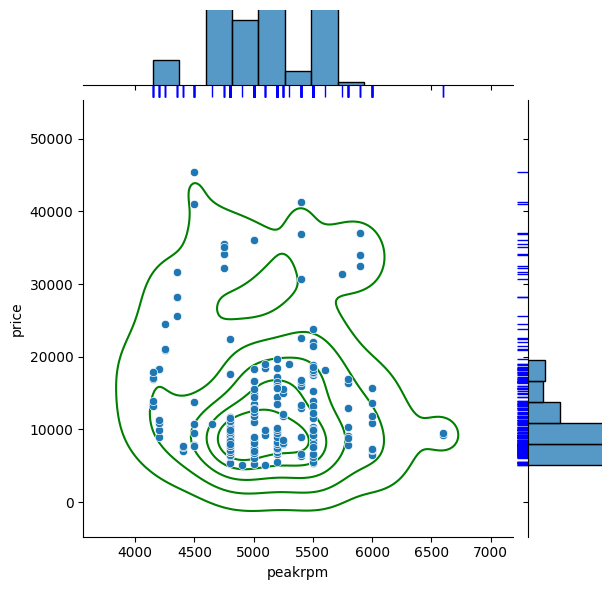

In [82]:
f = sns.jointplot(data=data, x='peakrpm', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

_____
Корреляция между пиковыми оборотами и ценой отсутствует 

**Citympg** 

Text(0, 0.5, 'price')

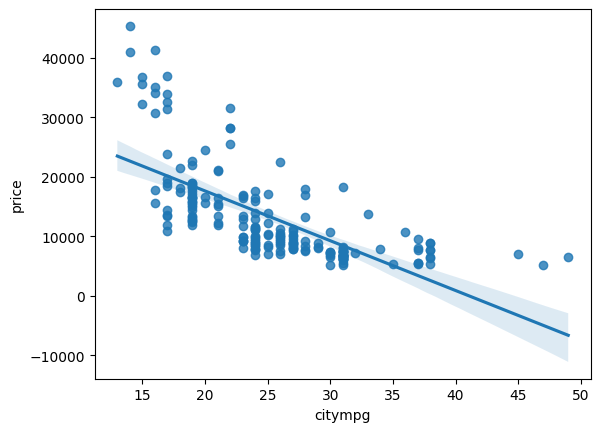

In [83]:
sns.regplot(x='citympg', y='price', data=data)
plt.xlabel('citympg')
plt.ylabel('price')

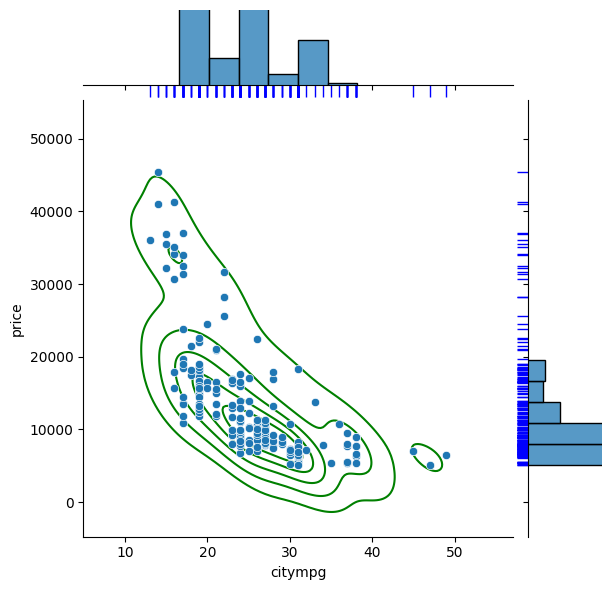

In [84]:
f = sns.jointplot(data=data, x='citympg', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

____
Наблюдаем отрицательную корреляцию между показателем среднего пройденного расстояния на единицу потребляемой энергии ( город ) и ценой, что вполне объяснимо. Чем больше пробег, тем ниже цена.

**Highwaympg** 'highwaympg' - показатель среднего пройденного расстояния на единицу потребляемой энергии ( шоссе )

Text(0, 0.5, 'price')

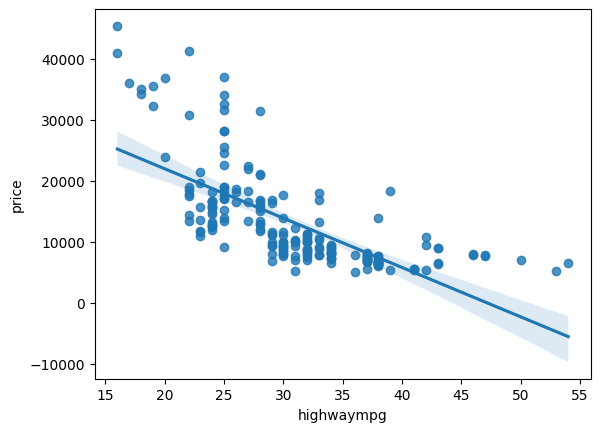

In [85]:
sns.regplot(x='highwaympg', y='price', data=data)
plt.xlabel('highwaympg')
plt.ylabel('price')

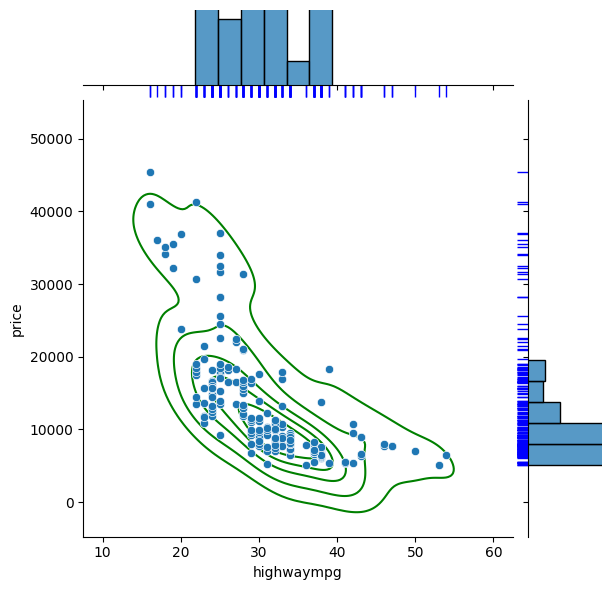

In [86]:
f = sns.jointplot(data=data, x='highwaympg', y='price')
f.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
f.plot_marginals(sns.rugplot, color="b", height=-.15, clip_on=False)

Построим матрицу корреляции, изучим её:

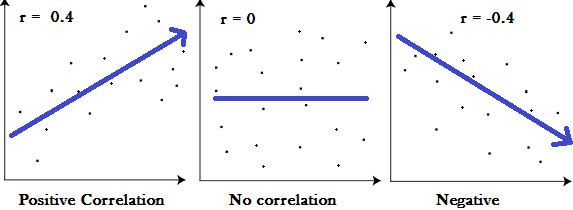

In [87]:
df = data[num_columns]

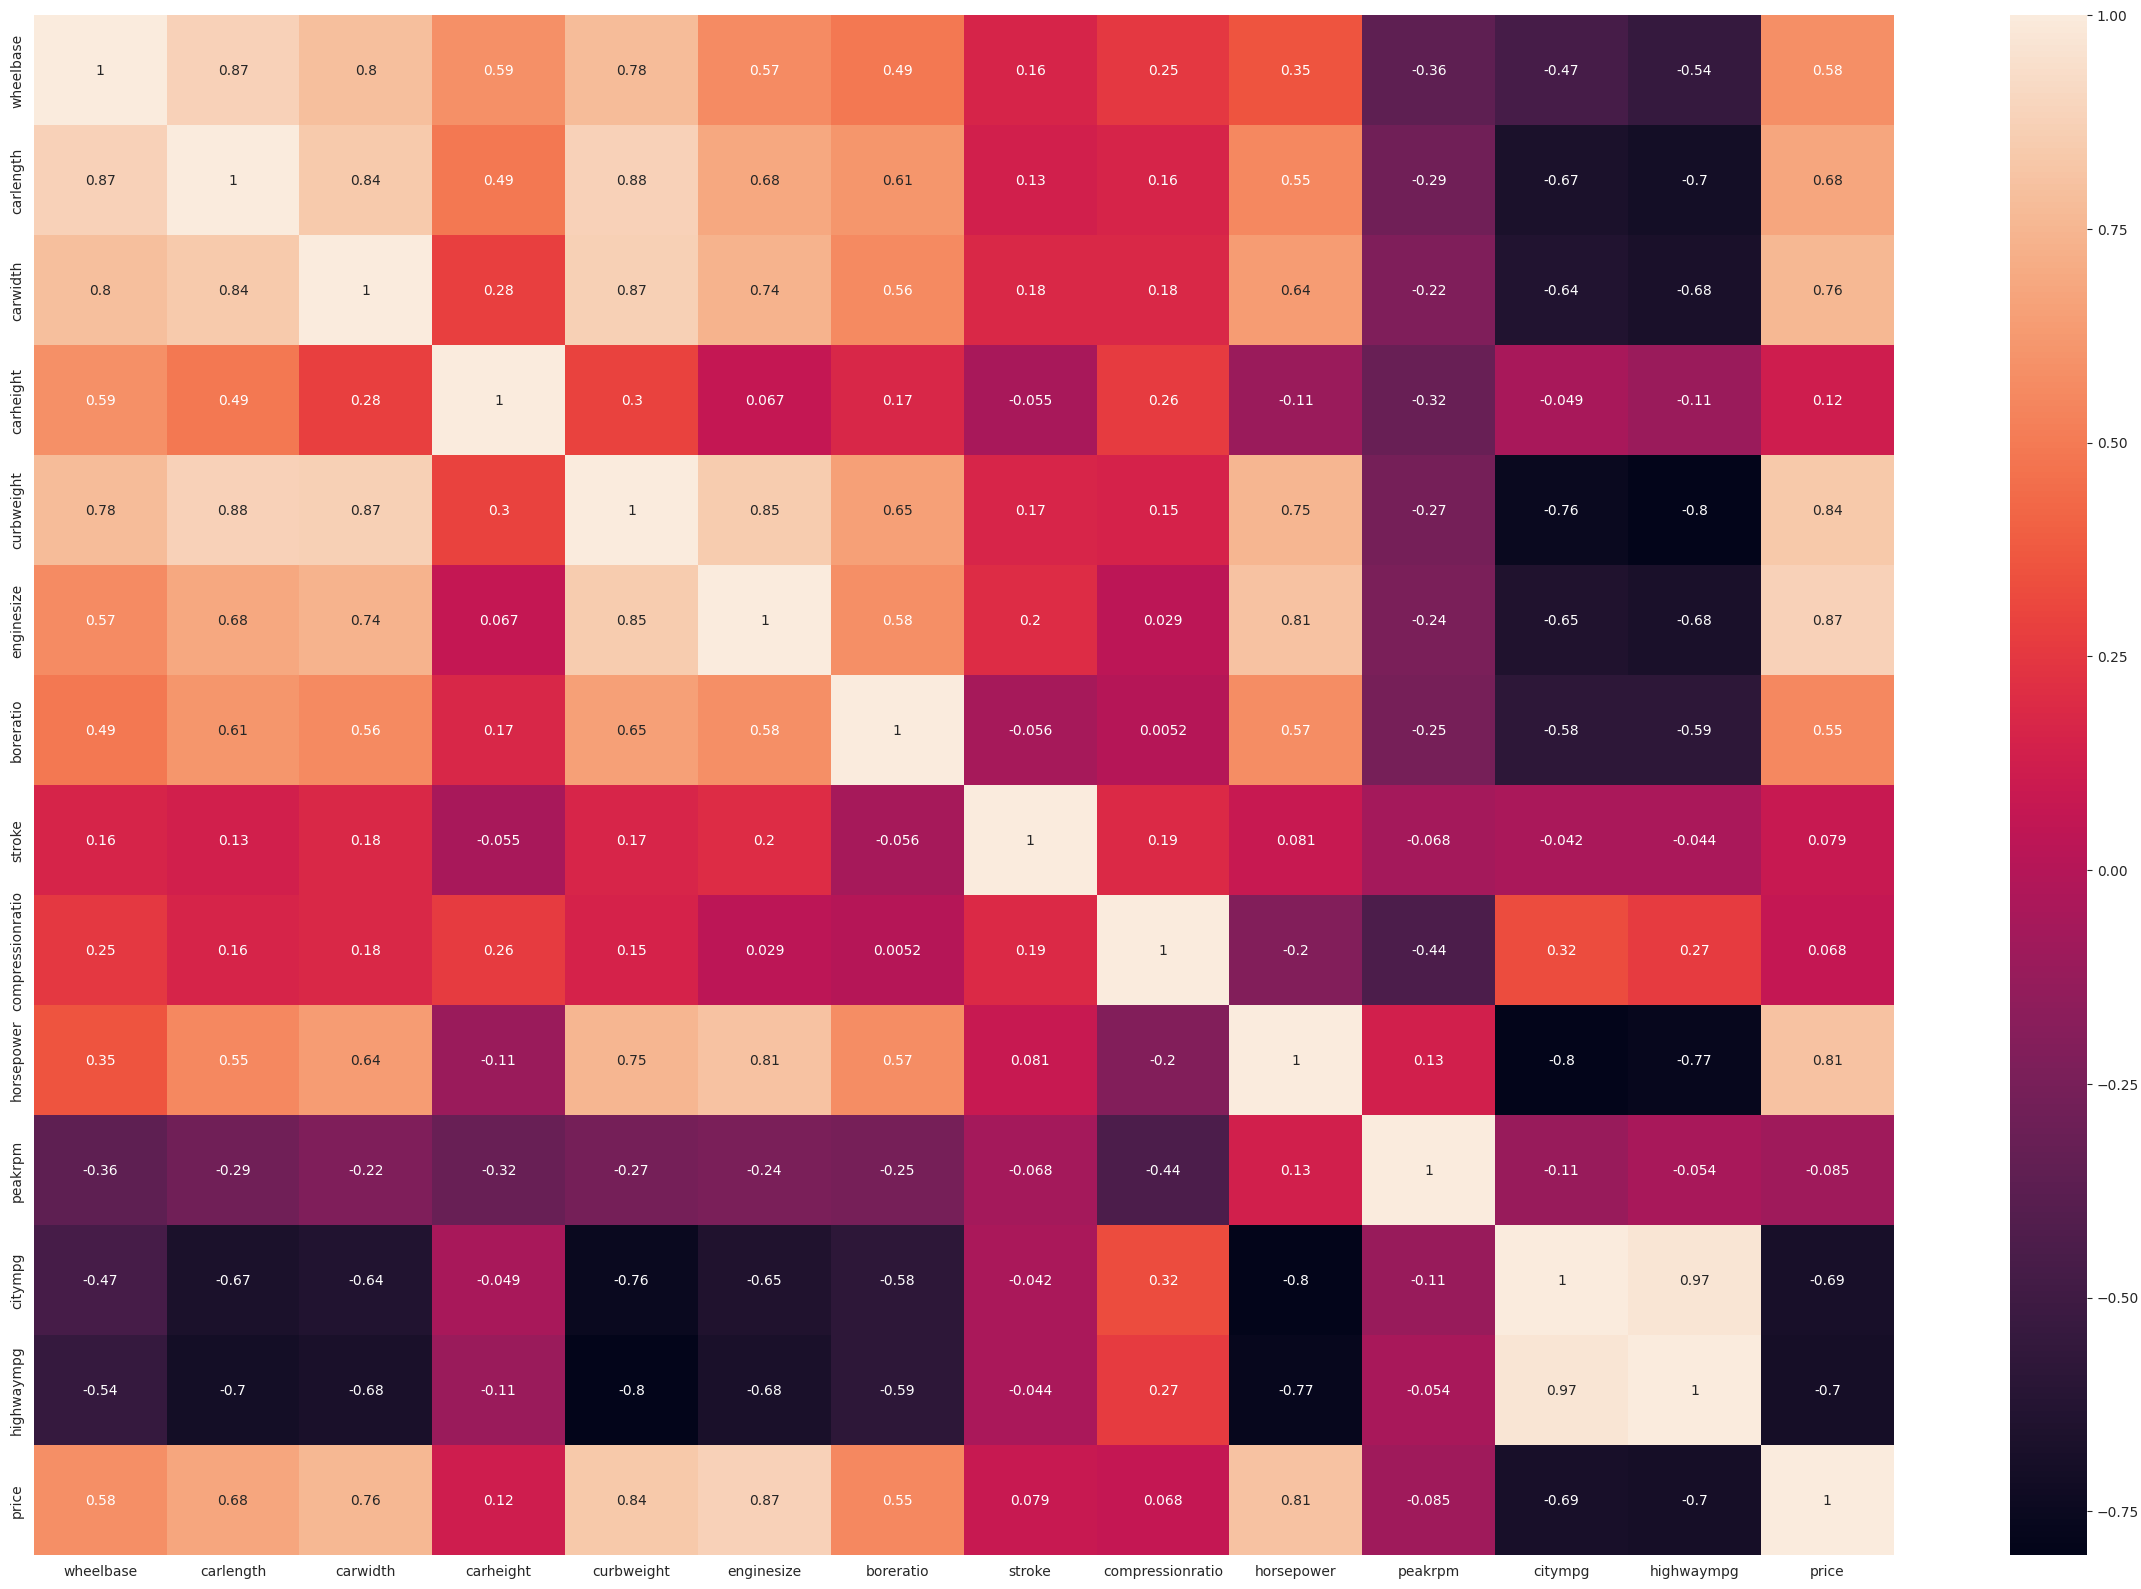

In [88]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(df.corr(), annot = True, cmap = 'rocket')

Для начала рассмотрим какие признаки наиболее сильно коррелируют с целевой переменной:

    - сильная положительная:
    
    длина автомобиля, ширина автомобиля, максимальная собственная масса транспортного средства, размер двигателя, лошадиные силы
    (carlength, carwidth, curbweight, enginesize, horsepower)
    
    - слабая положительная:
    
    колесная база(продольное расстояние между осями передних и задних колес ), отношение длины хода (L) к диаметру отверстия
    (wheelbase, borerstio )
   
    - сильная отрицательная:
    
    показатель среднего пройденного расстояния на единицу потребляемой энергии ( город ), показатель среднего пройденного расстояния на единицу потребляемой энергии ( шоссе )
    
    (citympg, highwaympg)
    
Также отметим корреляцию признаков между собой:

- wheelbase сильно коррелирует с curbweight,carlength, carwidth
- carlength сильно коррелирует с curbweight, carwidth, enginesize, boreratio, citympg, highwaympg
- curbweight сильно коррелирует с wheelbase, carlength, carwidth, curbweight, enginesize
- enginetype сильно коррелирует с curbweight, carlength, horsepower, citympg, highwaympg
- boreratio сильно коррелирует с curbweight, carlength
- horsepower сильно коррелирует с highwaympg, citympg, enginesize, curbweight, carwidth
- citympg сильно коррелирует с highwaympg, citympg, enginesize, curbweight,  carlength
- highwaympg сильно коррелирует с citympg, horsepower, enginesize, curbweight, carlength, carwidth


In [89]:
print(cat_columns)

['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [90]:
len(cat_columns)

11

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
data_final = data.copy()
encoder = LabelEncoder()

for x in cat_columns:
    data_final[x] = encoder.fit_transform(data_final[x])

In [93]:
data_final.head()

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0          5            0         1           0           1        0   
1          5            0         1           0           1        0   
2          3            0         1           0           1        2   
3          4            1         1           0           0        3   
4          4            1         1           0           0        3   

   drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0           2               0       88.6      168.8  ...         130   
1           2               0       88.6      168.8  ...         130   
2           2               0       94.5      171.2  ...         152   
3           1               0       99.8      176.6  ...         109   
4           0               0       99.4      176.6  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 25 columns]

In [95]:
data_normal = (data_final - data_final.min(axis=0)) / (data_final.max(axis=0) - data_final.min(axis=0))
data_normal.describe()

symboling  CompanyName    fueltype  aspiration  doornumber  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean     0.566829     0.580952    0.902439    0.180488    0.439024   
std      0.249061     0.299370    0.297446    0.385535    0.497483   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.400000     0.333333    1.000000    0.000000    0.000000   
50%      0.600000     0.571429    1.000000    0.000000    0.000000   
75%      0.800000     0.904762    1.000000    0.000000    1.000000   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

          carbody  drivewheel  enginelocation   wheelbase   carlength  ...  \
count  205.000000  205.000000      205.000000  205.000000  205.000000  ...   
mean     0.653659    0.663415        0.014634    0.354419    0.491780  ...   
std      0.214770    0.278085        0.120377    0.175562    0.184139  ...   
min      0.000000    0.000000        0.000000    0.000000    0.000000  ...   
25%      0.500000    0.500000        0.000000    0.230321    0.376119  ...   
50%      0.750000    0.500000        0.000000    0.303207    0.479104  ...   
75%      0.750000    1.000000        0.000000    0.460641    0.626866  ...   
max      1.000000    1.000000        1.000000    1.000000    1.000000  ...   

       enginesize  fuelsystem   boreratio      stroke  compressionratio  \
count  205.000000  205.000000  205.000000  205.000000        205.000000   
mean     0.248707    0.464808    0.564111    0.564483          0.196409   
std      0.157142    0.287601    0.193460    0.149332          0.248253   
min      0.000000    0.000000    0.000000    0.000000          0.000000   
25%      0.135849    0.142857    0.435714    0.495238          0.100000   
50%      0.222642    0.714286    0.550000    0.580952          0.125000   
75%      0.301887    0.714286    0.742857    0.638095          0.150000   
max      1.000000    1.000000    1.000000    1.000000          1.000000   

       horsepower     peakrpm     citympg  highwaympg       price  
count  205.000000  205.000000  205.000000  205.000000  205.000000  
mean     0.233821    0.398009    0.339431    0.388190    0.202540  
std      0.164767    0.194688    0.181726    0.181222    0.198323  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.091667    0.265306    0.166667    0.236842    0.066283  
50%      0.195833    0.428571    0.305556    0.368421    0.128519  
75%      0.283333    0.551020    0.472222    0.473684    0.282632  
max      1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 25 columns]

In [96]:
data_normal.head()

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0        1.0     0.000000       1.0         0.0         1.0     0.00   
1        1.0     0.000000       1.0         0.0         1.0     0.00   
2        0.6     0.000000       1.0         0.0         1.0     0.50   
3        0.8     0.047619       1.0         0.0         0.0     0.75   
4        0.8     0.047619       1.0         0.0         0.0     0.75   

   drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0         1.0             0.0   0.058309   0.413433  ...    0.260377   
1         1.0             0.0   0.058309   0.413433  ...    0.260377   
2         1.0             0.0   0.230321   0.449254  ...    0.343396   
3         0.5             0.0   0.384840   0.529851  ...    0.181132   
4         0.0             0.0   0.373178   0.529851  ...    0.283019   

   fuelsystem  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.714286   0.664286  0.290476            0.1250    0.262500  0.346939   
1    0.714286   0.664286  0.290476            0.1250    0.262500  0.346939   
2    0.714286   0.100000  0.666667            0.1250    0.441667  0.346939   
3    0.714286   0.464286  0.633333            0.1875    0.225000  0.551020   
4    0.714286   0.464286  0.633333            0.0625    0.279167  0.551020   

    citympg  highwaympg     price  
0  0.222222    0.289474  0.207959  
1  0.222222    0.289474  0.282558  
2  0.166667    0.263158  0.282558  
3  0.305556    0.368421  0.219254  
4  0.138889    0.157895  0.306142  

[5 rows x 25 columns]

**Feature selection**

Отбор признаков (feature selection) – это оценка важности того или иного признака с помощью алгоритмов машинного обучения и отсечение ненужных. 

Воспользуемся методом  Random Forest Importance. 

Стратегии на основе дерева, используемые случайными лесами, естественным образом ранжируются по тому, насколько хорошо они улучшают чистоту модели в плане данных. Таким образом, “обрезая” деревья ниже определенного коэффициента, мы можем подобрать наиболее важные признаки.

In [97]:

X = data_normal.drop(['price'],axis=1)
y = data['price']

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
model = RandomForestRegressor()      
rfe = RFE(estimator=model, n_features_to_select=20, step=1)
rfe = rfe.fit(X, y)


In [103]:
print('Отберем 20 лучших признаков:',X.columns[rfe.support_])

Отберем 20 лучших признаков: Index(['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [104]:
features = list(X.columns[rfe.support_])

In [105]:
print(features)

['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


Обучение и непосредственное прогнозирование:

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
data_x = X[features]
data_y = data.price
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state = 42)


In [108]:
data_y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [109]:
data_x.head()

CompanyName  fueltype  aspiration  carbody  drivewheel  wheelbase  \
0     0.000000       1.0         0.0     0.00         1.0   0.058309   
1     0.000000       1.0         0.0     0.00         1.0   0.058309   
2     0.000000       1.0         0.0     0.50         1.0   0.230321   
3     0.047619       1.0         0.0     0.75         0.5   0.384840   
4     0.047619       1.0         0.0     0.75         0.0   0.373178   

   carlength  carwidth  carheight  curbweight  enginetype  enginesize  \
0   0.413433  0.316667   0.083333    0.411171    0.000000    0.260377   
1   0.413433  0.316667   0.083333    0.411171    0.000000    0.260377   
2   0.449254  0.433333   0.383333    0.517843    0.833333    0.343396   
3   0.529851  0.491667   0.541667    0.329325    0.500000    0.181132   
4   0.529851  0.508333   0.541667    0.518231    0.500000    0.283019   

   fuelsystem  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.714286   0.664286  0.290476            0.1250    0.262500  0.346939   
1    0.714286   0.664286  0.290476            0.1250    0.262500  0.346939   
2    0.714286   0.100000  0.666667            0.1250    0.441667  0.346939   
3    0.714286   0.464286  0.633333            0.1875    0.225000  0.551020   
4    0.714286   0.464286  0.633333            0.0625    0.279167  0.551020   

    citympg  highwaympg  
0  0.222222    0.289474  
1  0.222222    0.289474  
2  0.166667    0.263158  
3  0.305556    0.368421  
4  0.138889    0.157895

Реализуем кросс - валидацию:

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

def cv_params(model, param_grid):
    scoring = 'neg_mean_absolute_error' 
    opt_params = GridSearchCV(
      estimator = model, # модель
      param_grid = param_grid, # параметры
      scoring = scoring, # стратегия валидаци
      cv = 5,#количество слоев кросс - валидации
      #verbose = 10 
      n_jobs = -1 ) #количество потоков для обучения , -1 = все
    opt_params.fit(X_train,y_train) #учимся на оптимальных параметрах
    params = opt_params.best_params_ #лучшие параметры
    best_score = opt_params.best_score_ #лучший результат

    print(f'Best score:{round(-best_score,2)}')
    print(f'Best parameters:{params}\n')

    return params

Воспользуемся алгоритмом Random Forest. Это универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев.

Также составим сетку, по которой будут перебираться параметры, и найдем лучший score и параметры, с которыми он достигается.

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf_param_grid = {
    'max_depth': [3,5,7,10,15], #глубина дерева
    'n_estimators':[100,200,300,400] #кол-во деревьев в десу
}
rf_clean = RandomForestRegressor()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:1657.37
Best parameters:{'max_depth': 7, 'n_estimators': 300}



In [112]:
from sklearn.metrics import r2_score

In [113]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
r2_train = r2_score(y_train, pred_rf_train)
r2_test = r2_score(y_test, pred_rf)


In [114]:
print(f'R2 train = {r2_train}')
print(f'R2 test  = {r2_test}')

R2 train = 0.984193336826384
R2 test  = 0.9409880182574135


In [118]:
from sklearn.metrics import mean_absolute_percentage_error

In [119]:
MAPE_train = mean_absolute_percentage_error(y_train, pred_rf_train)
MAPE_test = mean_absolute_percentage_error(y_test, pred_rf)

In [122]:
print(f'MAPE train = {MAPE_train*100}%')
print(f'MAPE test  = {MAPE_test*100}%')

MAPE train = 5.249111115789365%
MAPE test  = 10.8014247565191%


In [123]:
from sklearn.metrics import mean_absolute_error
MAE_train =  mean_absolute_error(y_train, pred_rf_train)
MAE_test =  mean_absolute_error(y_test, pred_rf)

In [124]:
print(f'MAE train = {MAE_train}')
print(f'MAE test  = {MAE_test}')

MAE train = 693.83447927048
MAE test  = 1379.6431562047565


Попробуем catboost ( но без cv )

In [131]:
from catboost import Pool,CatBoostRegressor

In [ ]:
model_cat = CatBoostRegressor()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model_cat.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                    )

In [132]:
train_pool = Pool(X_train, 
                  y_train)
test_pool = Pool(X_test)

model = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

0:	learn: 4774.3870095	total: 2.22ms	remaining: 2.22ms
1:	learn: 3457.6666271	total: 3.52ms	remaining: 0us
[22626.32773692 14428.09635452  8705.00890422 15436.51263244
 33303.47462819  8705.00890422  8705.00890422  8745.16906431
  8745.16906431  8705.00890422 14428.09635452  8745.16906431
 14428.09635452  8705.00890422 33303.47462819  8745.16906431
  8745.16906431 14428.09635452  8705.00890422  8745.16906431
  8705.00890422 22626.32773692  8705.00890422  8705.00890422
  8705.00890422 22626.32773692 14428.09635452 14428.09635452
  8705.00890422 14428.09635452 33303.47462819  8705.00890422
  8745.16906431 22511.74401484  8705.00890422 33303.47462819
  8745.16906431  8705.00890422  8705.00890422 14428.09635452
  8745.16906431 14428.09635452 15436.51263244  8745.16906431
  8705.00890422  8705.00890422  8705.00890422  8745.16906431
 14428.09635452 14428.09635452  8705.00890422 14428.09635452
  8705.00890422  8705.00890422  8705.00890422  8705.00890422
 14428.09635452  8705.00890422 23634.74

In [134]:

r2_test_cat = r2_score(y_test, preds)


In [135]:
print(r2_test_cat)

0.7253040095238039
